# Homework 1

In [228]:
library(Stat2Data)
library(lattice)
library(psych)
library(mosaic)
library(ggplot2)

In [229]:
data(BaseballTimes)
head(BaseballTimes)

Game,League,Runs,Margin,Pitchers,Attendance,Time
CLE-DET,AL,14,6,6,38774,168
CHI-BAL,AL,11,5,5,15398,164
BOS-NYY,AL,10,4,11,55058,202
TOR-TAM,AL,8,4,10,13478,172
TEX-KC,AL,3,1,4,17004,151
OAK-LAA,AL,6,4,4,37431,133


## Problem 1.27

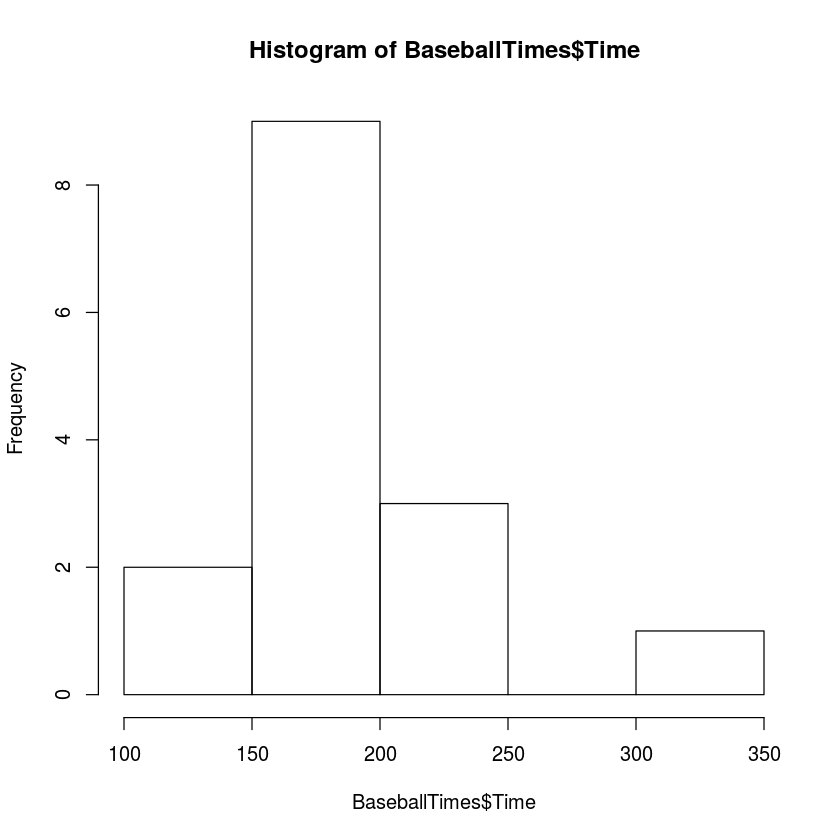

In [230]:
hist(BaseballTimes$Time)

### a.1) The distribution is right skewed (you can see that there is positive skew in the summary stats below)

In [231]:
describe(BaseballTimes)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Game*,1,15,8.000000,4.472136e+00,8,8.000000,5.9304,1,15,14,0.0000000,-1.4413333,1.1547005
League*,2,15,1.533333,5.163978e-01,2,1.538462,0.0000,1,2,1,-0.1204928,-2.1133333,0.1333333
Runs,3,15,10.133333,5.914470e+00,10,9.692308,5.9304,3,23,20,0.5484525,-0.6484896,1.5271095
Margin,4,15,3.866667,3.090693e+00,4,3.461538,4.4478,1,12,11,0.9970121,0.5823349,0.7980134
Pitchers,5,15,8.200000,3.858201e+00,7,7.923077,4.4478,4,16,12,0.5198489,-1.0995397,0.9961832
Attendance,6,15,29768.800000,1.227933e+04,30395,29076.615385,15902.3676,13478,55058,41580,0.3449801,-1.0221847,3170.5087112
Time,7,15,182.666667,4.620554e+01,168,176.153846,25.2042,133,317,184,1.5983669,2.0755231,11.9302204


### a.2) Below is the outlier

In [232]:
# Get the indices of all rows where the Time column has a value > 300
# Pass that to the index operator [] and you'll get just the rows for those indices
# You can pass a vector of column names as the second argument to the index operator ([])
# if you want only those columns, as it is we get all columns back 
BaseballTimes[(BaseballTimes$Time > 300), ]

,Game,League,Runs,Margin,Pitchers,Attendance,Time
15,NYM-PHI,NL,15,1,16,45204,317


### a.3) My explanation is that since there was a margin of 1, it is possible that they went into extra innings and the game only ended once one of the teams scored (which happened to take a decent amount of time). Also, Pitchers would explain it as well because it takes game time to switch out pitchers 

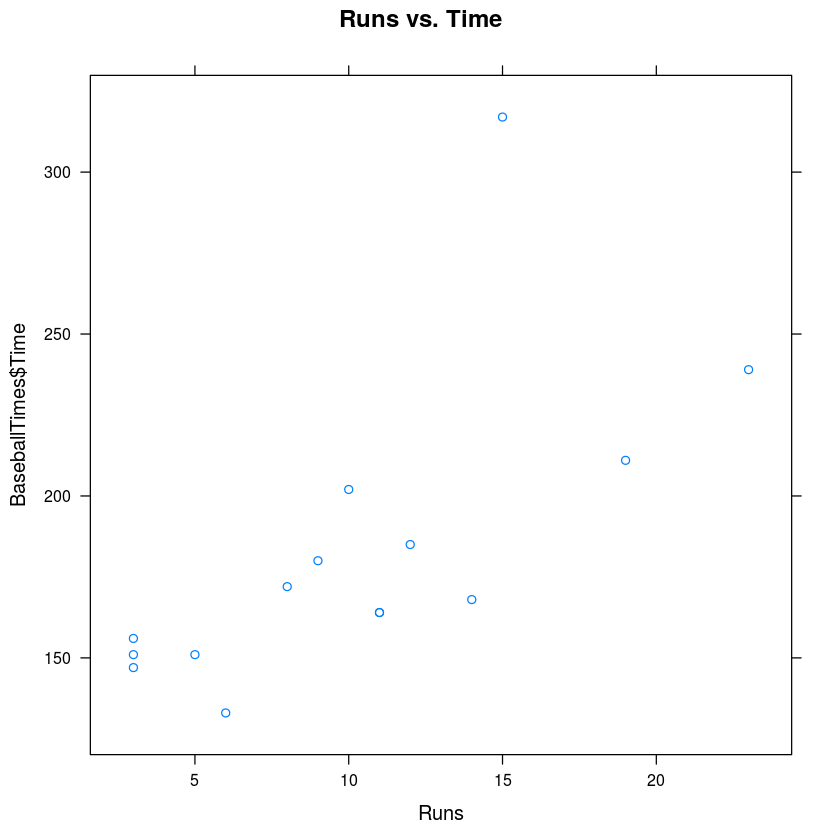

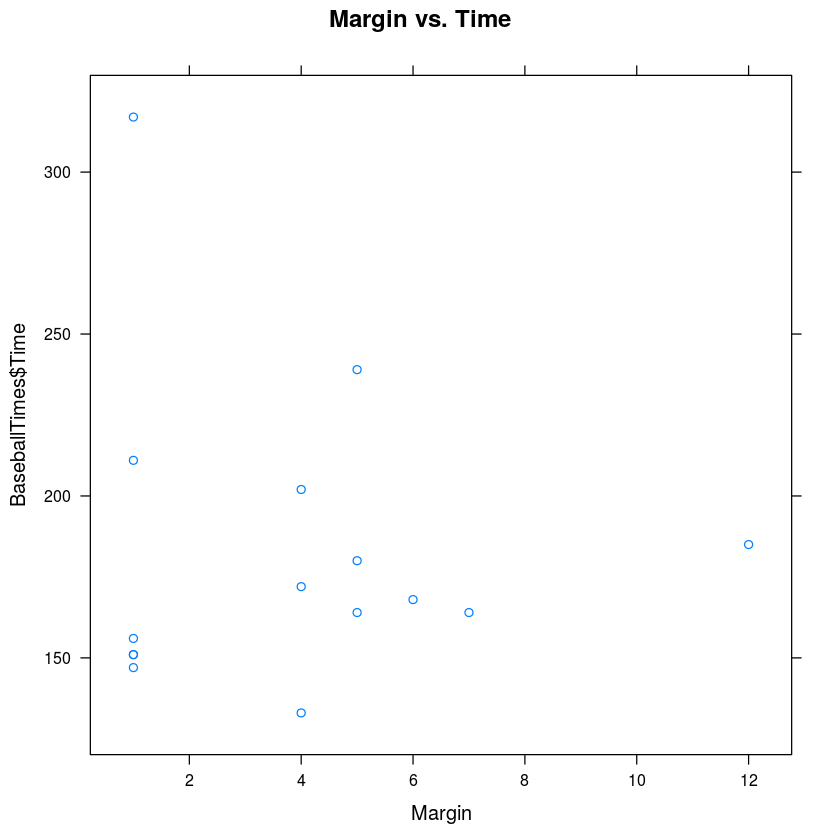

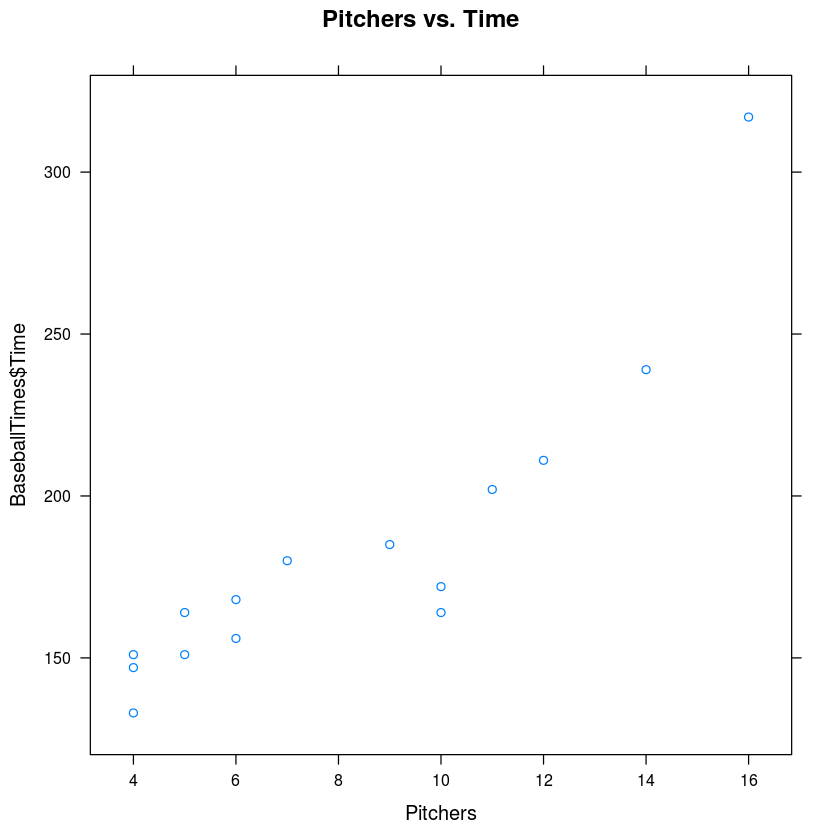

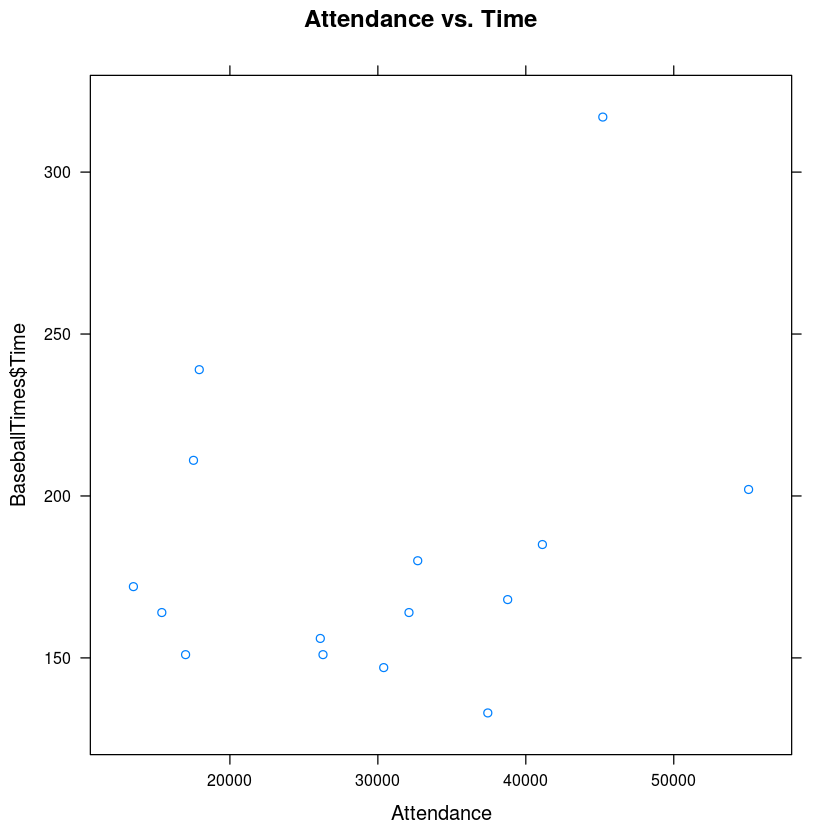

In [233]:
# xyplot(BaseballTimes$Time ~ BaseballTimes$Pitchers, main='Pitchers vs Time')
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}
# print(cor(BaseballTimes$Time, BaseballTimes$Pitchers))

### b) The best predictor seems to be the Pitchers field because it is linear and there is a strong positive, relatively linear association

In [234]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
                 94.84                   10.71  


# c) Regression equation: $\hat{y} = 94.84 + 10.71x$
# The slope coefficient means that time will increase by 10.71 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 94.84 minutes

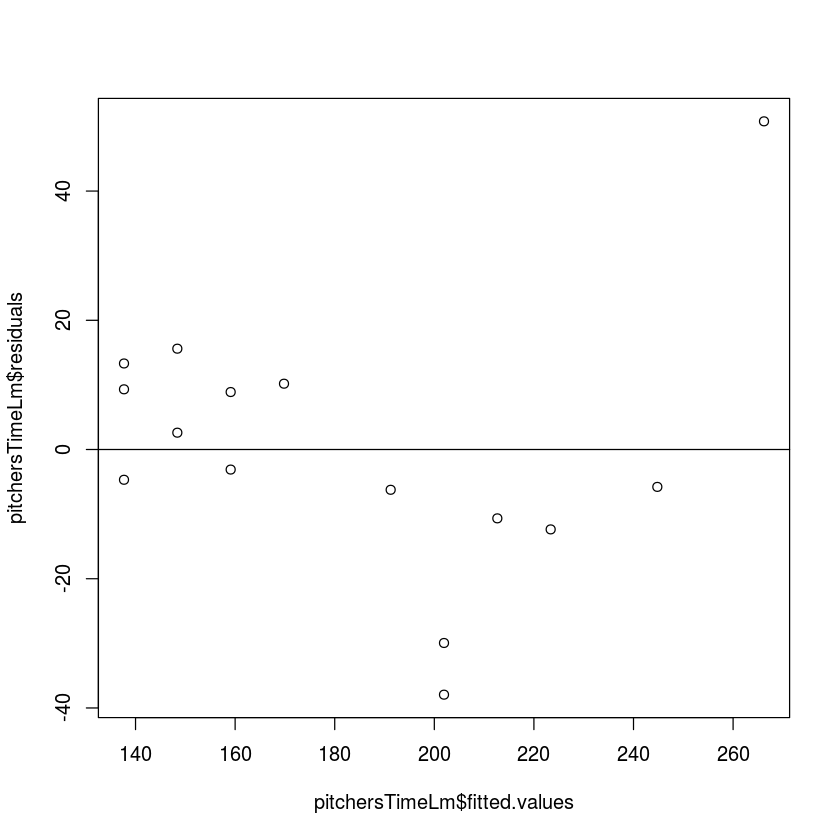

In [235]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

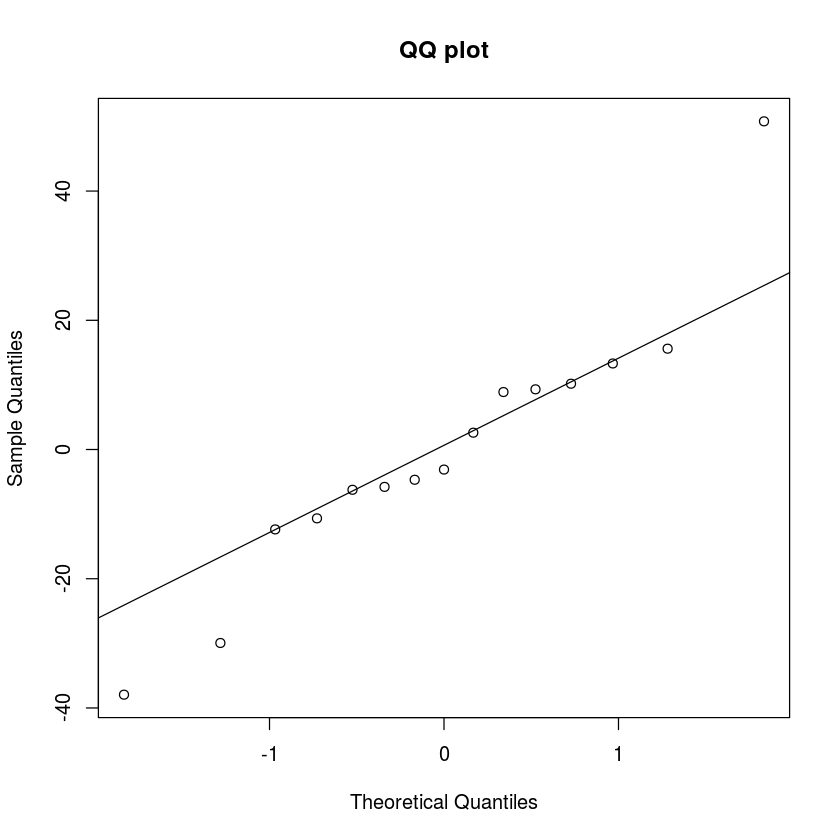

In [236]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### d) The tails of the QQ plot do not follow the normal line. So we can conclude that the normality condition for the residuals is not met. The fitted vs residuals plot indicates a zero mean on the residuals. 

### Problem 2.37

In [237]:
for(col in colnames(BaseballTimes)) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(paste(col, "vs Time", stats::cor(BaseballTimes[[col]], BaseballTimes$Time)))
    }
}
print(paste("Max = .902, Pitchers vs Time"))

[1] "Runs vs Time 0.681314374166042"
[1] "Margin vs Time -0.0713583115282997"
[1] "Pitchers vs Time 0.894308212107318"
[1] "Attendance vs Time 0.257192477359853"
[1] "Max = .902, Pitchers vs Time"


### The best fit is provided by the predictor variable that is most highly correlated. Some of this analysis will be repeated below because for another question it asked me to use the best predictor variable to predict Time, and in that case as well, it was the variable Predictor.

In [238]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
summary(pitchersTimeLm)


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.945  -8.445  -3.104   9.751  50.794 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              94.843     13.387   7.085 8.24e-06 ***
BaseballTimes$Pitchers   10.710      1.486   7.206 6.88e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.46 on 13 degrees of freedom
Multiple R-squared:  0.7998,	Adjusted R-squared:  0.7844 
F-statistic: 51.93 on 1 and 13 DF,  p-value: 6.884e-06


### Regression Equation: $\hat{Time} = 113.869 + 7.746*\text{Pitchers}$, with slope coefficient of 7.746

In [239]:
cor.test(BaseballTimes$Pitchers, BaseballTimes$Time)


	Pearson's product-moment correlation

data:  x and y
t = 7.2063, df = 13, p-value = 6.884e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7050380 0.9646464
sample estimates:
      cor 
0.8943082 


### According to the p-value, we can conclude that there is significant evidence that suggests that the true value of the population correlation is not equal to zero. We can also see this in the fact that the confidence interval does not contain 0 

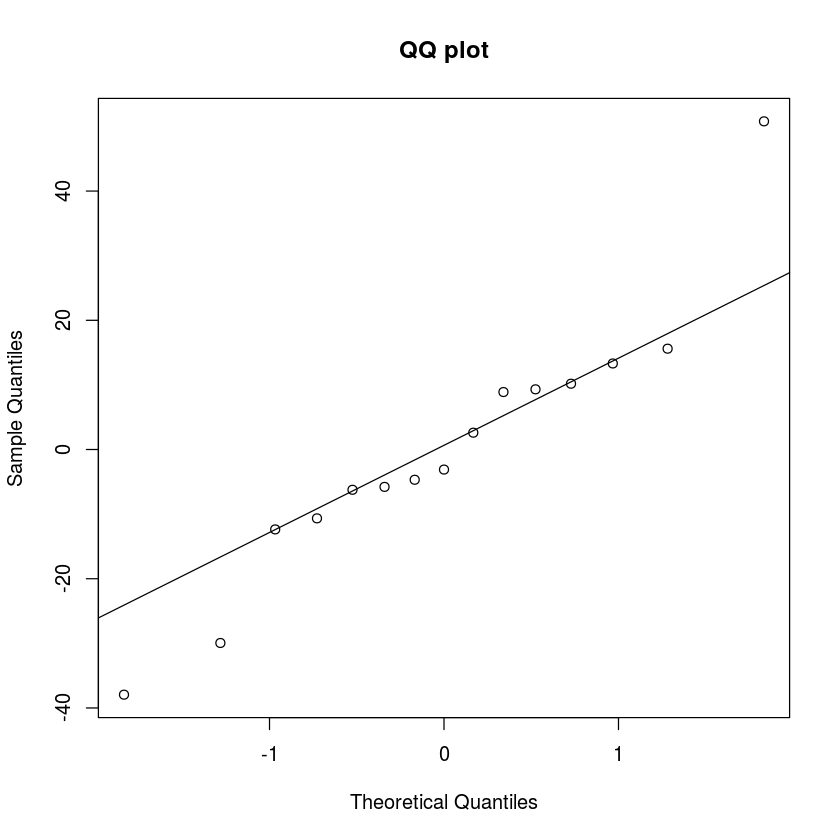

In [240]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

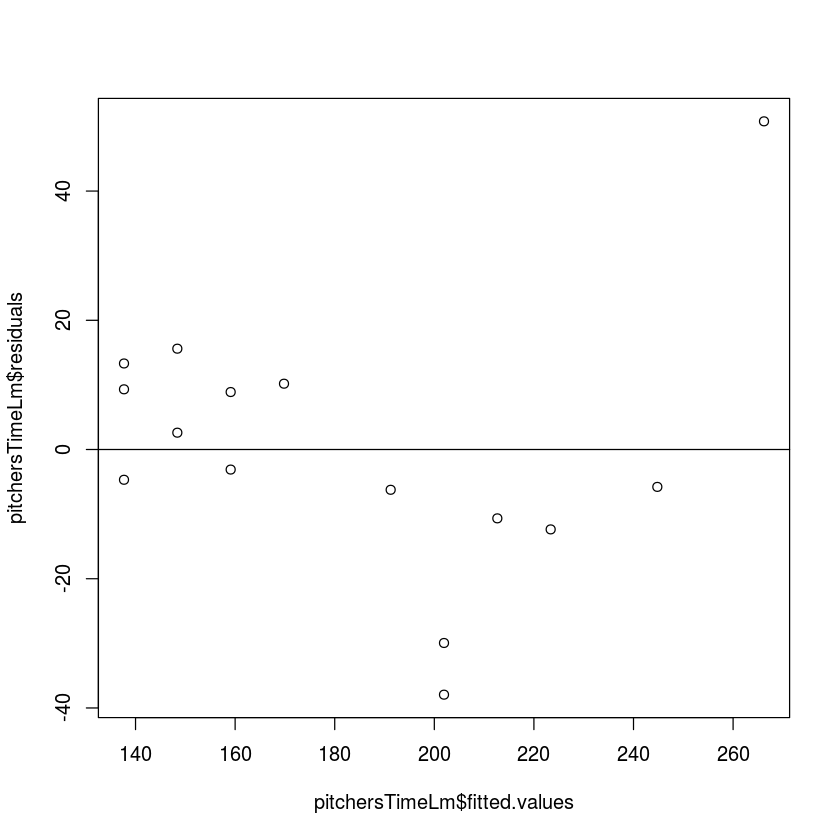

In [241]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

### The residuals vs fit plot suggests a zero mean with randomly scattered errors (no clear nonlinear trend). The QQ plot suggests that the error terms are not perfectly normal. I would say that there are significantly nonnormal to invalidate any inferences made on the model 

## Problem 1.28

### a) The outlier found in problem 1.27 also has the largest residual for the model used in problem 1.27 

In [242]:
BaseballTimes$Id <- seq.int(nrow(BaseballTimes))

In [243]:
BaseballTimes <- BaseballTimes[ !(BaseballTimes$Id %in% c(15)), ]

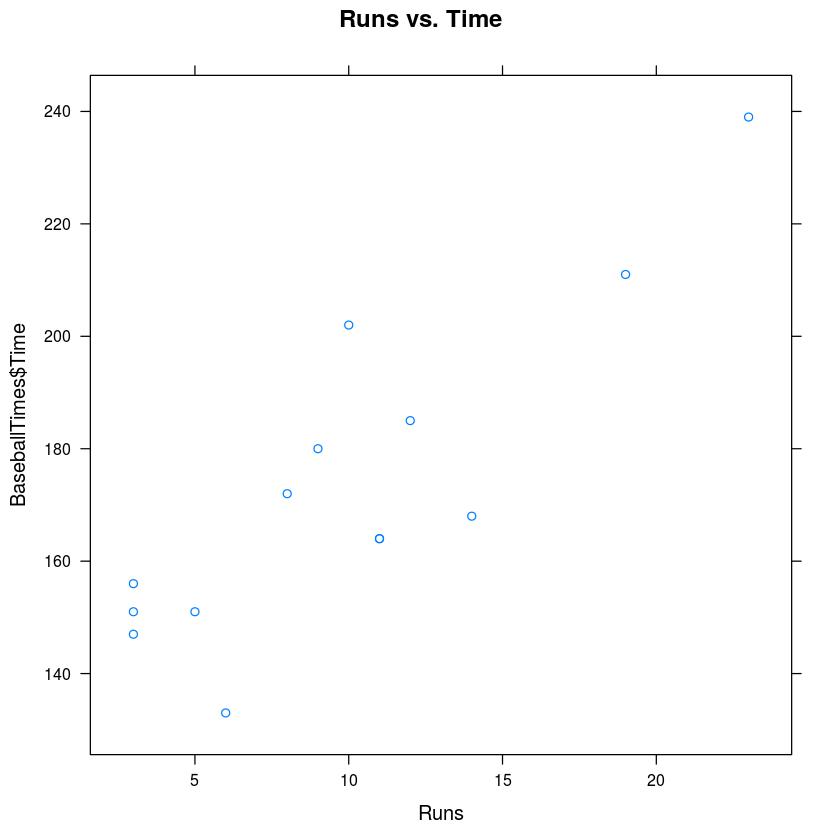

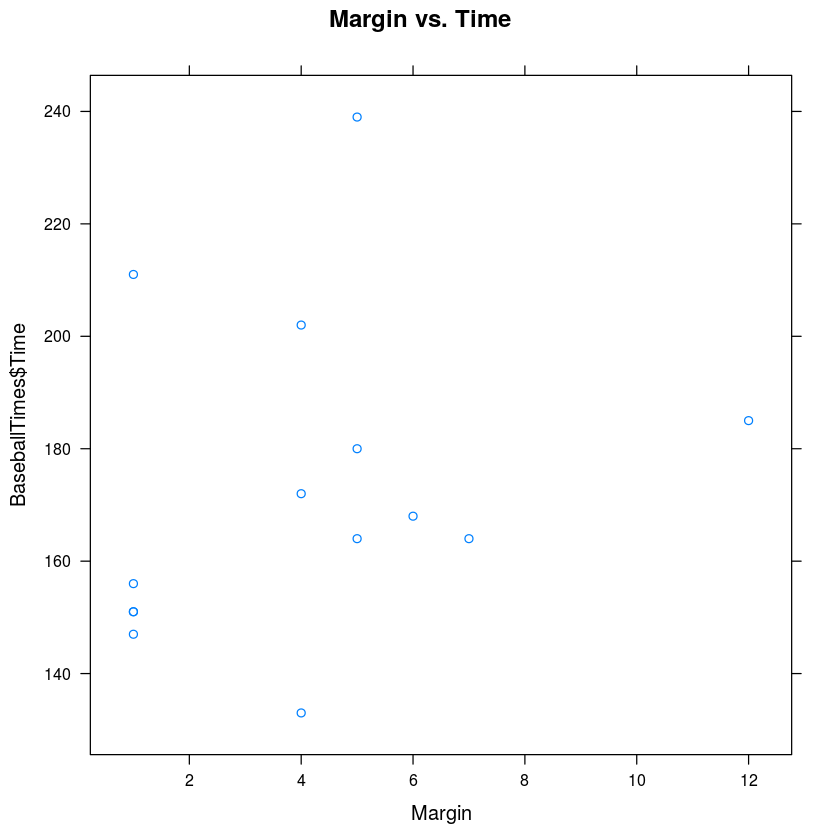

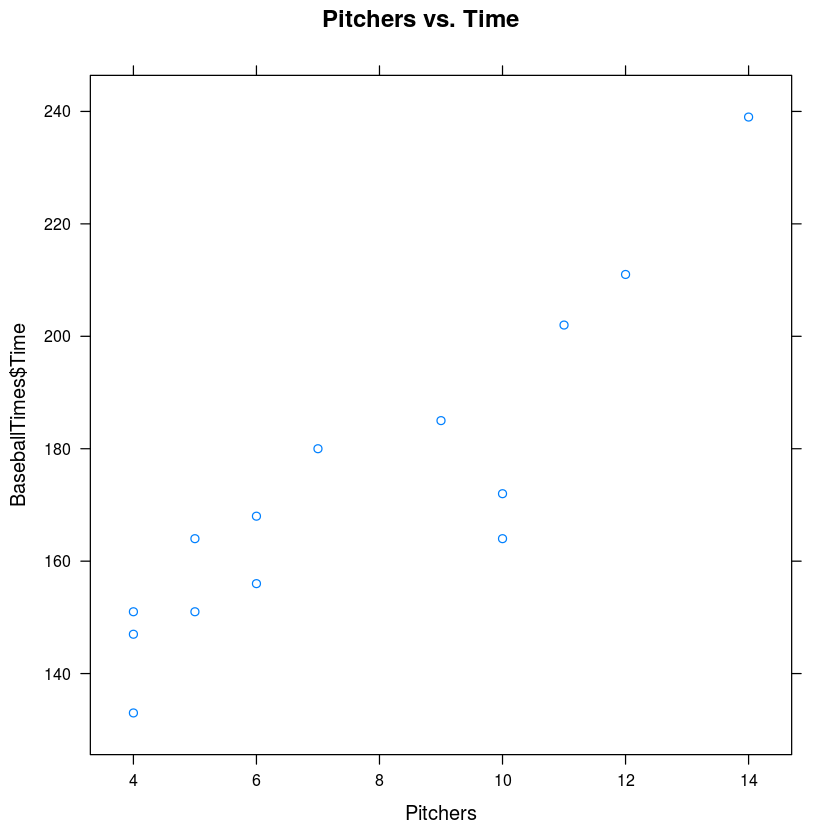

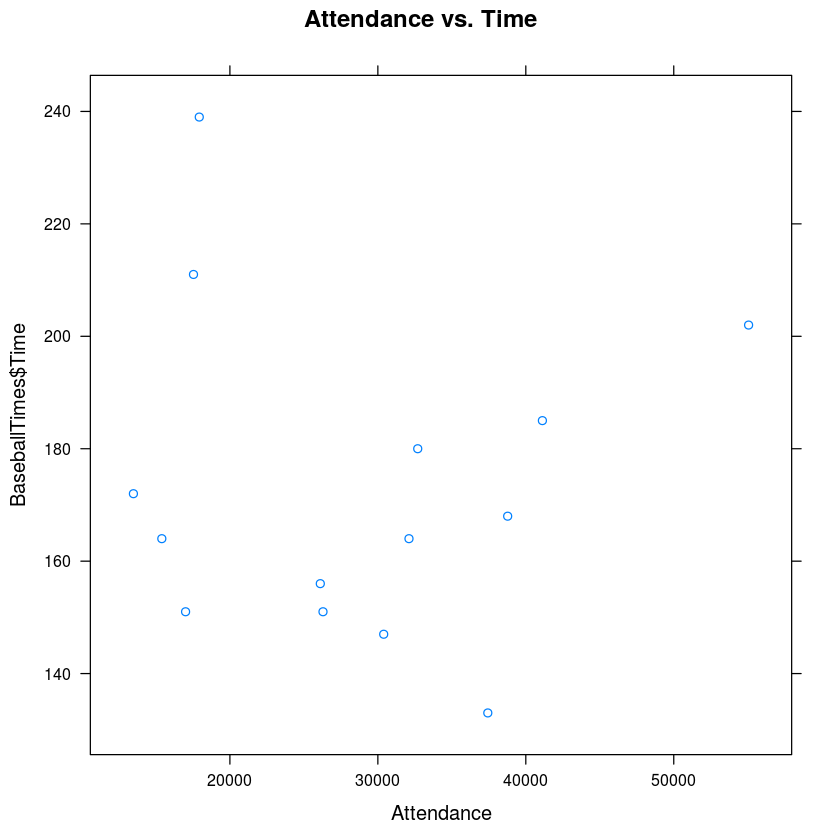

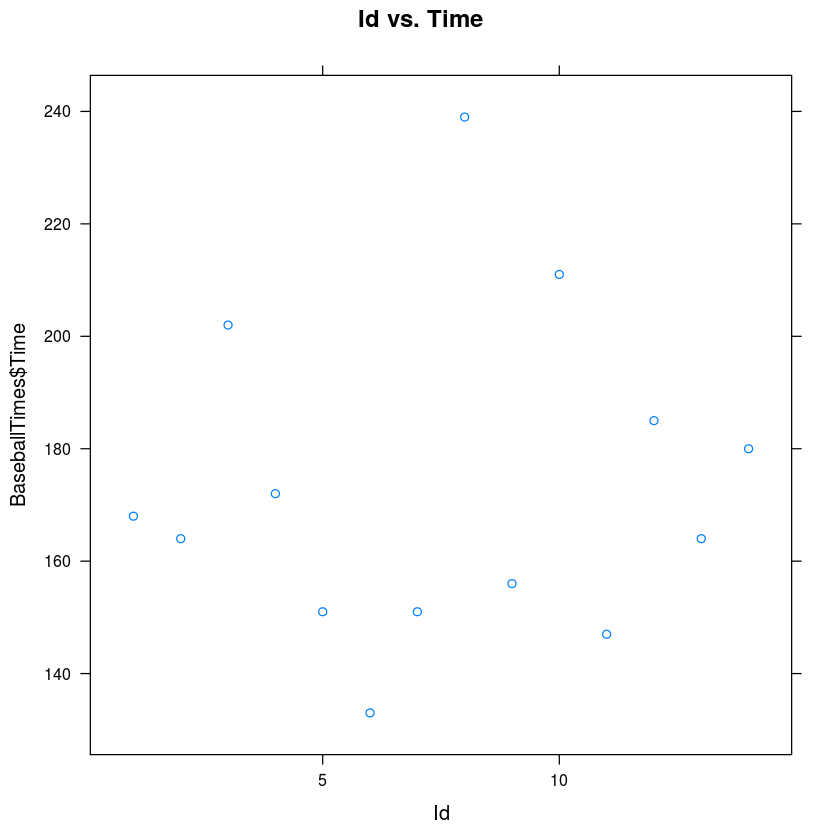

In [244]:
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}

In [245]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
               113.869                   7.746  


# c) Regression equation: $\hat{y} = 113.86 + 7.746x$
# The slope coefficient means that time will increase by 7.746 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 113.86 minutes

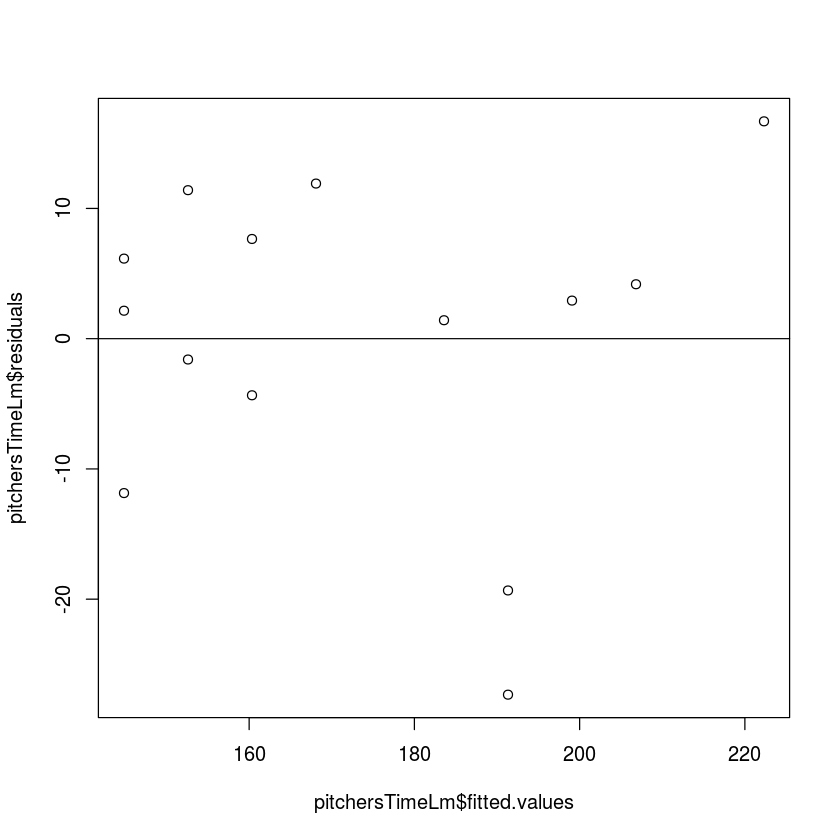

In [246]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

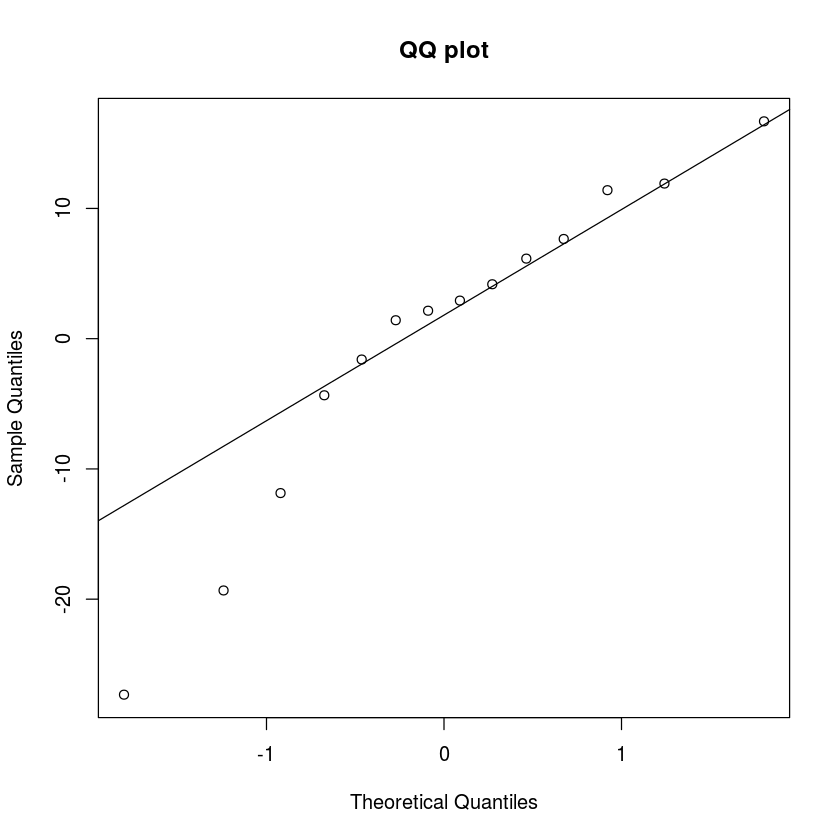

In [247]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### b/c) Omitting the outlier made the plot of Pitcher vs Time more linear. The Residuals vs Fit plot shows roughly zero mean for the residuals. However, the QQ plot is still not following the normal line. Therefore, the conditions for inference are not met.

### Summary: I learned that the number of pitchers in a game is a reasonable predictor of the amount of time the game will take. We couldn't make any inference on the linear model because the normality of errors condition is not met for this data, but the model does explain 81% of the variance in the response variable (Time). Based on the scatterplots above and the correlation, the next best predictor variable would be Runs.

### Start of Homework 1.2 stuff

### Problem 2.1 - False

### Problem 2.2 - False

### Problem 2.3 - True

### Problem 2.4 - False

### Problem 2.5 - False

### Problem 2.6 - True

### Problem 2.7 - True

### Problem 1.12

### Problem 1.2 - Sparrows Slope = 0.467

### Problem 1.3 - Sparrows Intercept = 1.37

### Problem 1.4 - Sparrows Regression Standard Error = 0.03472

### Problem 1.5 - DF = 114

### Problem 1.6 Residual = 100 - 10 = 90

### Problem 1.10

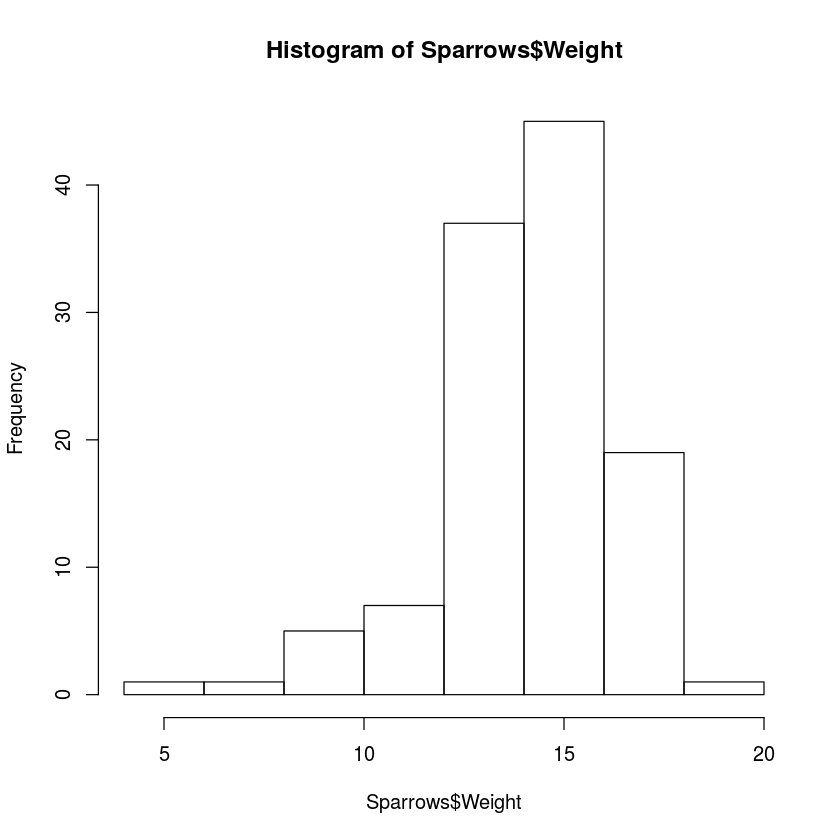

In [248]:
data(Sparrows)
hist(Sparrows$Weight)

### a) It looks like the weight is quite normally distributed which indicates that our errors will probably not be a perfect normal distribution either

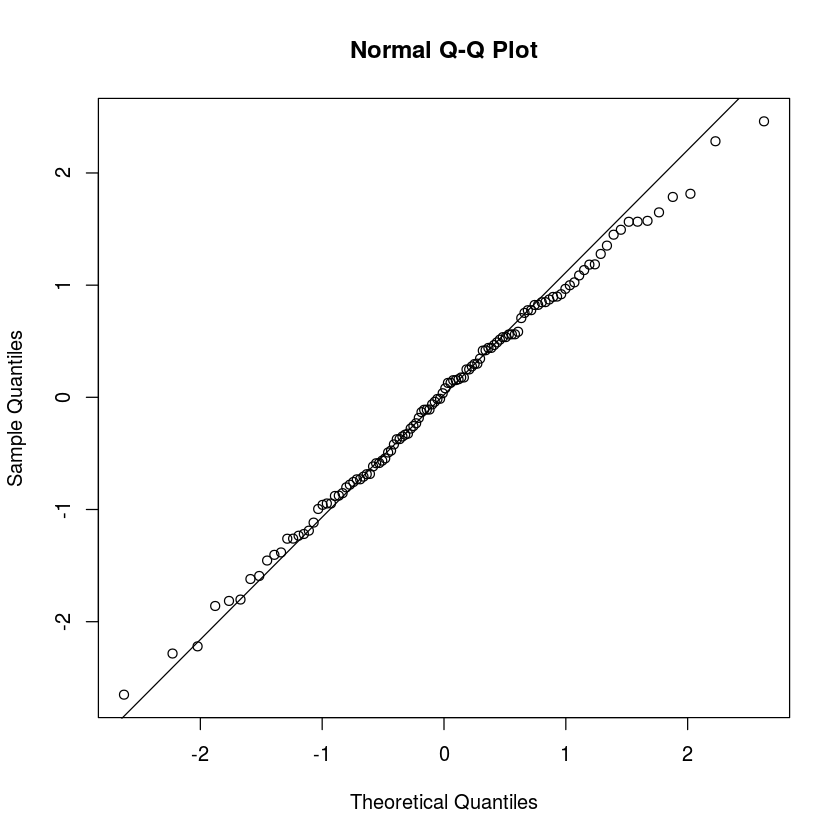

In [249]:
winglengthLm = lm(Sparrows$Weight ~ Sparrows$WingLength)
## This computes the residuals for all y and corresponding y_hats
winglengthStdRes = rstandard(winglengthLm)
qqnorm(winglengthStdRes)
qqline(winglengthStdRes)

### Based on the plot, we have mostly normal errors but it deviates slightly at the tails. This would probably still be considered normal, and the assumptions of the t tests would hold

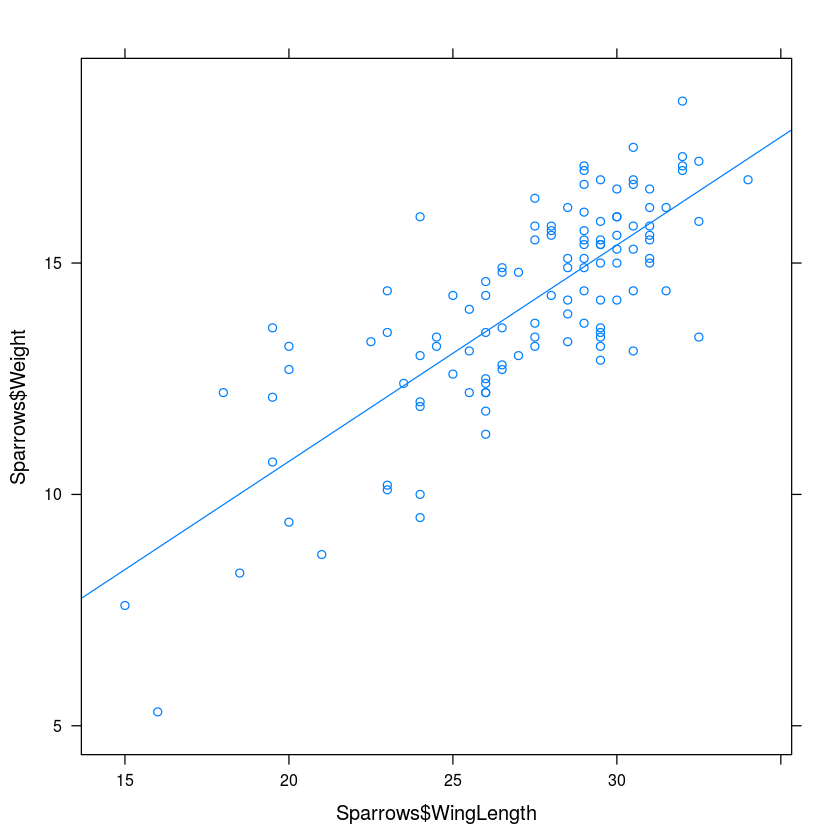

In [250]:
xyplot(Sparrows$Weight ~ Sparrows$WingLength, type=c('p','r'))

###  c) You could probably consider the second point from the left in the lower left hand side of the plot to be an outlier. It doesn't follow the general linear trend set by sparrows with larger and smaller wing length. It also has relatively high leverage since it is at a more extreme value of wing length

### Problem 2.16

In [251]:
summary(winglengthLm)


Call:
lm(formula = Sparrows$Weight ~ Sparrows$WingLength)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5440 -0.9935  0.0809  1.0559  3.4168 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.36549    0.95731   1.426    0.156    
Sparrows$WingLength  0.46740    0.03472  13.463   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.4 on 114 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6105 
F-statistic: 181.3 on 1 and 114 DF,  p-value: < 2.2e-16


### a) The slope (for this sample 0.46740) is significantly different from 0. This is because the p-value is significantly less than .05. The p-value is so small that there is very very strong evidence of a relationship between wing length and weight.

In [252]:
# This is the manual version
# Margin of error
diff = 1.96 * 0.03472
print(paste("diff =", diff))
# Compute above and below
above = 0.46740 + diff
below = 0.46740 - diff
print(paste('confidence interval',below, above))

# This is the nicer version
confint(winglengthLm, 'Sparrows$WingLength', level=0.95)

[1] "diff = 0.0680512"
[1] "confidence interval 0.3993488 0.5354512"


,2.5 %,97.5 %
Sparrows$WingLength,0.3986288,0.5361792


### b) This confidence interval says that if the assumptions of the linear regression model hold (which I would say they do) that 95% of samples produce an interval which overlaps with the true regression coefficient $\beta_1$. So we are 95% confident that our estimate, $\hat{\beta_1} = 0.03472$, is within (+/-) .06805 mm of the true regression coefficient $\beta_1$

### The confidence interval does not contain 0. Thus we can be certain that the true value of $\beta_1$ is not 0. If zero were in the interval, we would have a p-value >= .05

### Problem 2.17

### <br>$h_0: p = 0$ <br> $h_1: p \neq 0$

In [253]:
cor.test(Sparrows$WingLength, Sparrows$Weight)


	Pearson's product-moment correlation

data:  x and y
t = 13.463, df = 114, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7013866 0.8451074
sample estimates:
     cor 
0.783512 


### a) Based on the p-value for the 5% significance test, we can conclude that there is a significant association between wing length and weight, meaning that the data suggests that $p \neq 0$

In [254]:
summary(winglengthLm)


Call:
lm(formula = Sparrows$Weight ~ Sparrows$WingLength)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5440 -0.9935  0.0809  1.0559  3.4168 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.36549    0.95731   1.426    0.156    
Sparrows$WingLength  0.46740    0.03472  13.463   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.4 on 114 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6105 
F-statistic: 181.3 on 1 and 114 DF,  p-value: < 2.2e-16


### b) This information is contained in the $r^2$ value of the output. For the given data (sample), the model explains 61.39% of the variation. 

In [255]:
anova(winglengthLm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Sparrows$WingLength,1,355.0513,355.051343,181.2535,2.62194e-25
Residuals,114,223.3107,1.958866,NA,NA


### c) The f-test indicates that the wing length coefficient $\beta_1$ is significantly different from 0. This is because under the $h_0$, we would expect the F value to be close to 1. The F value we got is very different from 1 and the p-value is extremely small as well.

In [256]:
 13.463^2

[1] 181.2524

### The square of the t-value from testing correlation is the same as the F-value

### Summary: From the analysis, we can see that the wing length of a sparrow is a good predictor of weight in our model since our model explains about 61% of the variance in the response. There is a strong positive correlation between wing length and weight (this is reflected in the positive regression coefficient estimate in our model), which indicates that sparrows with larger wing span weigh more on average. 

### Problem 1.12

In [257]:
data(Caterpillars)

In [258]:
ctp = Caterpillars

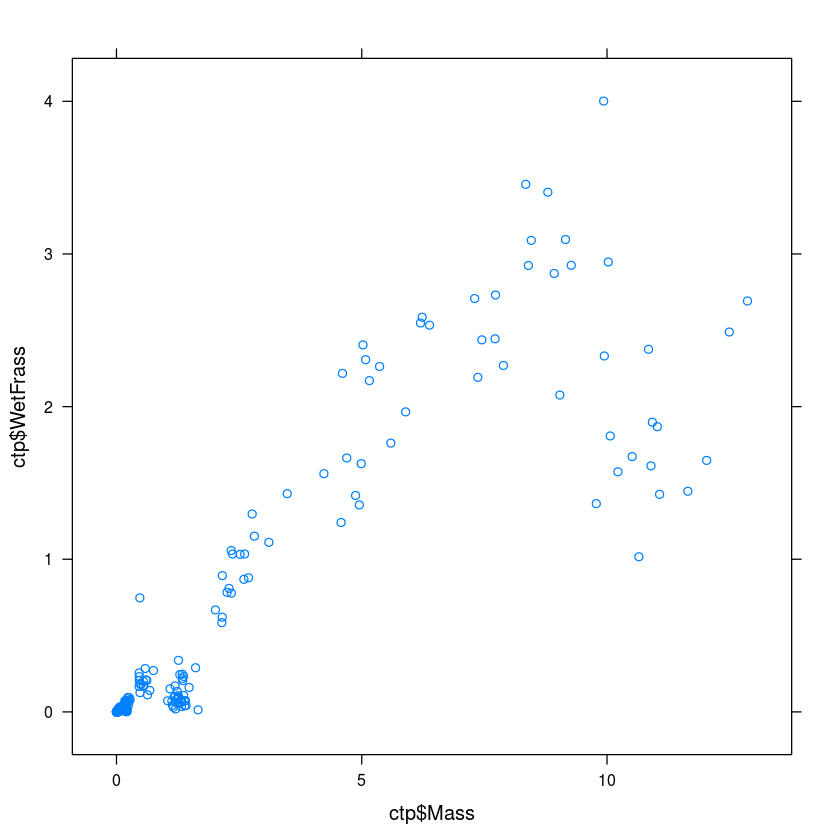

In [259]:
xyplot(ctp$WetFrass ~ ctp$Mass)

### It seems linear up to mass = 10, but then the pattern is more of a polynomial. Also it seems that mass and the wetfrass could be log transformed given the large cluster of points at lower mass and wetfrass values

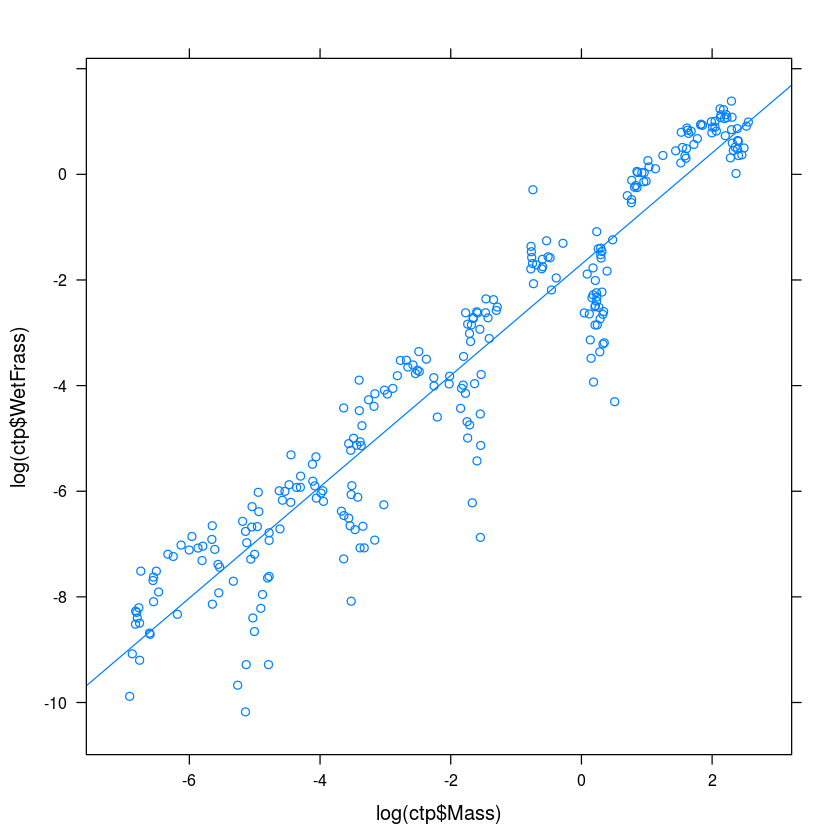

In [260]:
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), type=c('p', 'r'))

### The pattern is much more linear but there are stacks of points below the more linear part of the line. They seem more or less equal distance in x direction from each other. I would prefer this model as compared to the first

In [261]:
massWetFrassLm = lm(log(ctp$WetFrass) ~ log(ctp$Mass))
summary(massWetFrassLm)


Call:
lm(formula = log(ctp$WetFrass) ~ log(ctp$Mass))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5442 -0.4751  0.3511  0.6691  2.1913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.70072    0.06854  -24.81   <2e-16 ***
log(ctp$Mass)  1.05361    0.02054   51.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9416 on 265 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.9082 
F-statistic:  2632 on 1 and 265 DF,  p-value: < 2.2e-16


### Prediction Equation: $\log_{e}(\hat{wetFrass}) = \beta_0 + \beta_1 \log_{e}(\text{Mass}) $, where $\beta_0 = -1.70072$ and $\beta_1 = 1.05361$

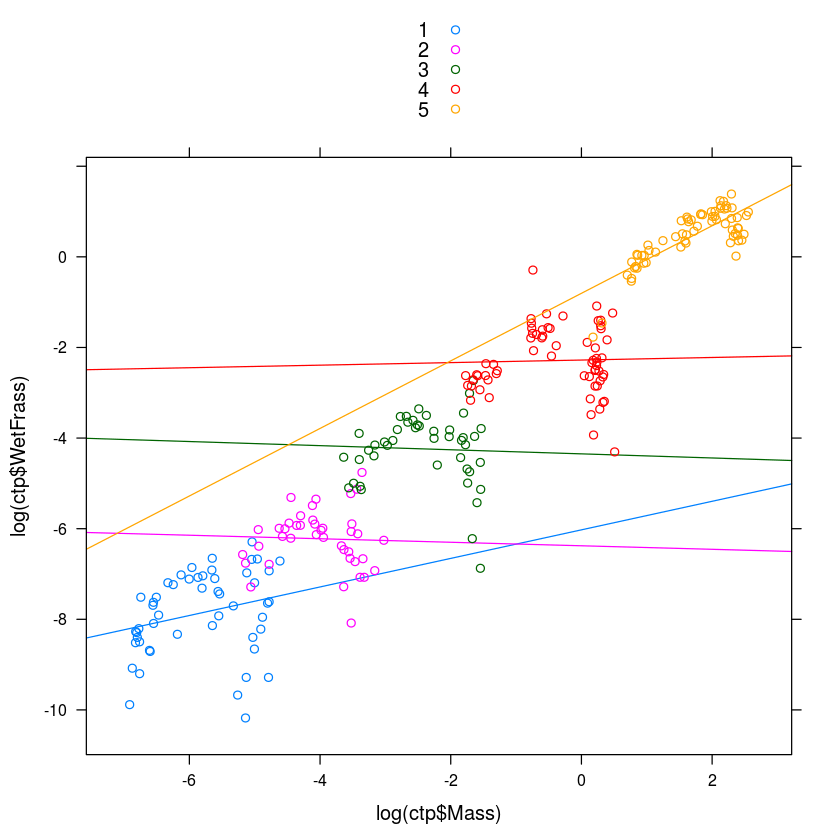

In [262]:
# qplot(x = Mass, y = WetFrass, data = ctp, color = Instar, main = "Title")
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), group=ctp$Instar, type=c('p', 'r'), auto.key=TRUE)

### I think that the fifth life stage follows the regression line in log transformed model the best but even it deviates, overestimating for smaller mass and earlier life stages. It seems that we should incorporate the instar variable into our model to make better predictions

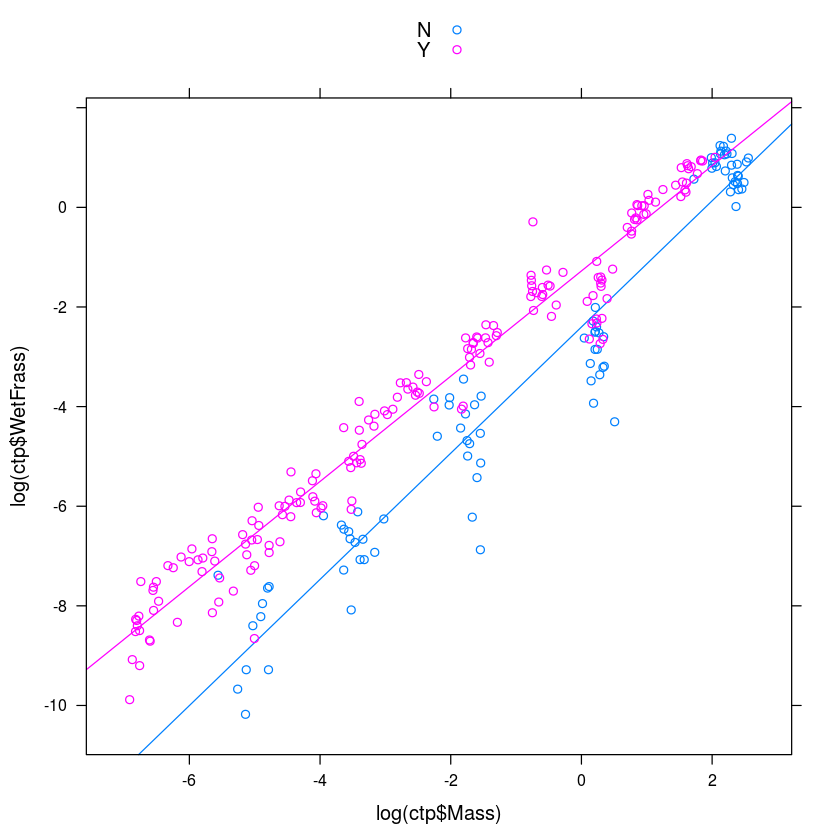

In [263]:
xyplot(log(ctp$WetFrass) ~ log(ctp$Mass), group=ctp$Fgp, type=c('p', 'r'), auto.key=TRUE)

### The first group follows a linear trend (the Y group) and the second doesn't. It seems to be stacked vertically rather than more linear 

### Problem 1.13

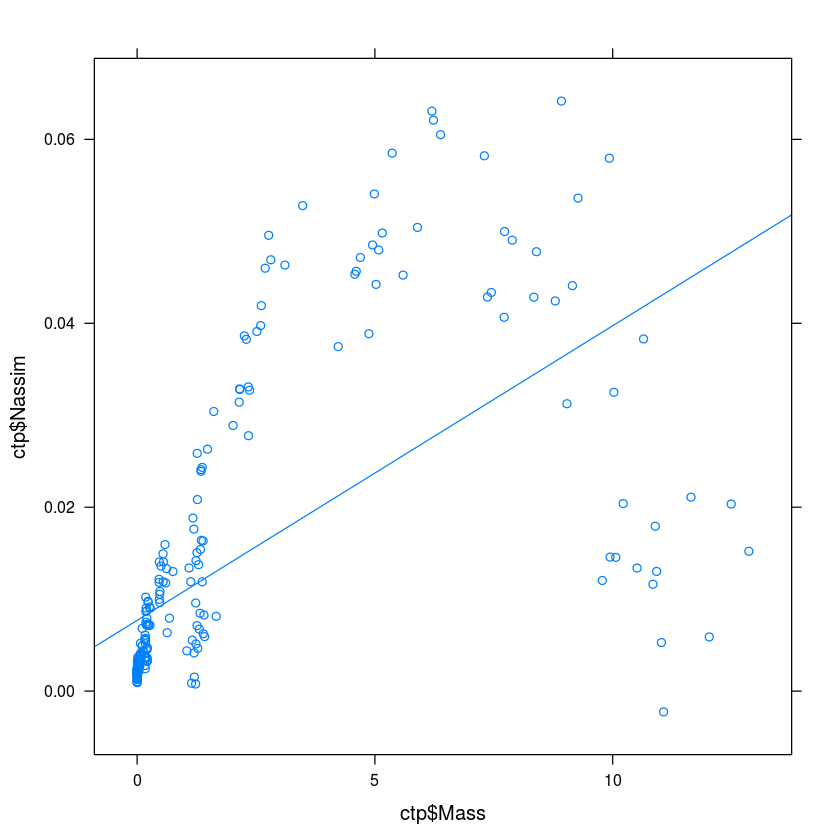

In [264]:
xyplot(ctp$Nassim ~ ctp$Mass, type=c('p','r'))

### a) This is definitely not linear. It might be more linear if we log transform it. It looks more polynomial than anything else.

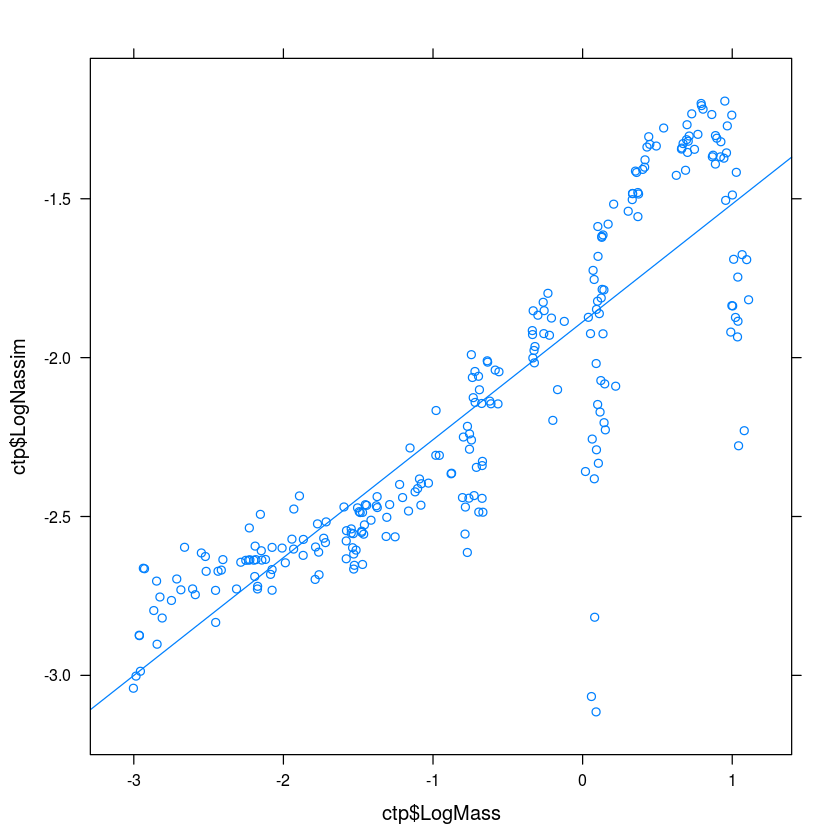

In [265]:
xyplot(ctp$LogNassim ~ ctp$LogMass, type=c('p','r'))

### b) This looks more linear but it looks like there is some underlying variable governing the variance, particularly at higher values of LogMass

### c) I prefer the second plot as it is more linear

In [266]:
massNassimLm = lm(ctp$LogNassim ~ ctp$LogMass)
summary(massNassimLm)


Call:
lm(formula = ctp$LogNassim ~ ctp$LogMass)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26089 -0.11558  0.02162  0.16725  0.41862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.88738    0.01841 -102.53   <2e-16 ***
ctp$LogMass  0.37096    0.01332   27.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2501 on 251 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.7555,	Adjusted R-squared:  0.7545 
F-statistic: 775.6 on 1 and 251 DF,  p-value: < 2.2e-16


### c) Prediction Equation: $\log_{10}(\hat{Lassim}) = \beta_0 + \beta_1 \log_{10}(\text{Mass}) $, where $\beta_0 = -0.73861$ and $\beta_1 = 1.05361$

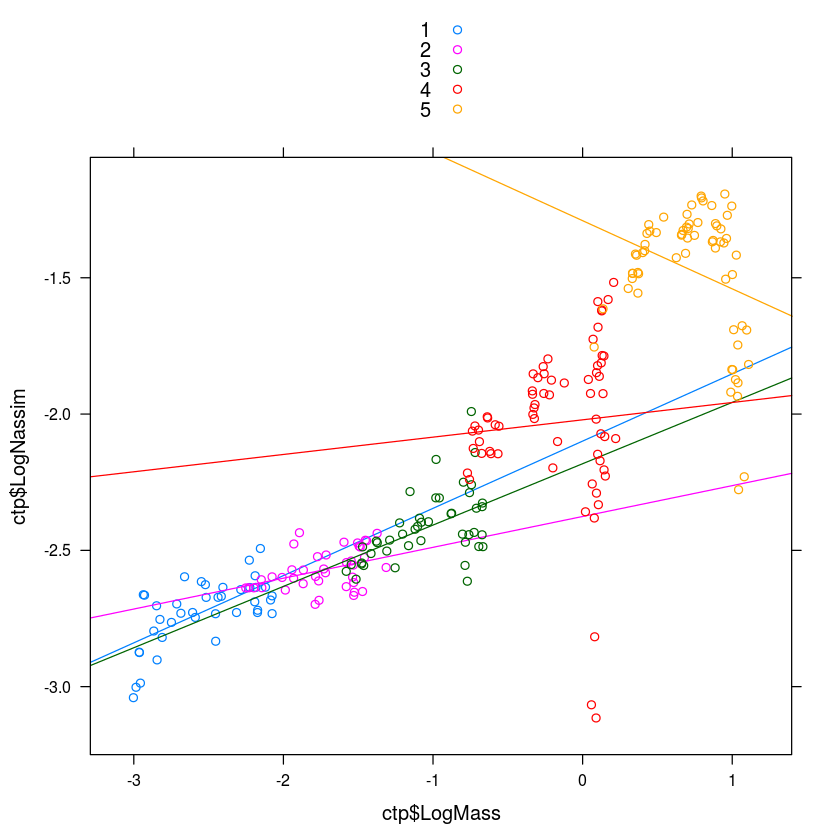

In [267]:
xyplot(ctp$LogNassim ~ ctp$LogMass, group=ctp$Instar, type=c('p', 'r'), auto.key=TRUE)

### It looks like the first 3 life stages follow (with some deviation) the same linear trend as that shown in the original xyplot. Furthermore, the linear trend is not consistent for the last 2 life stages

Warning message in log(ctp$Nassim):
“NaNs produced”

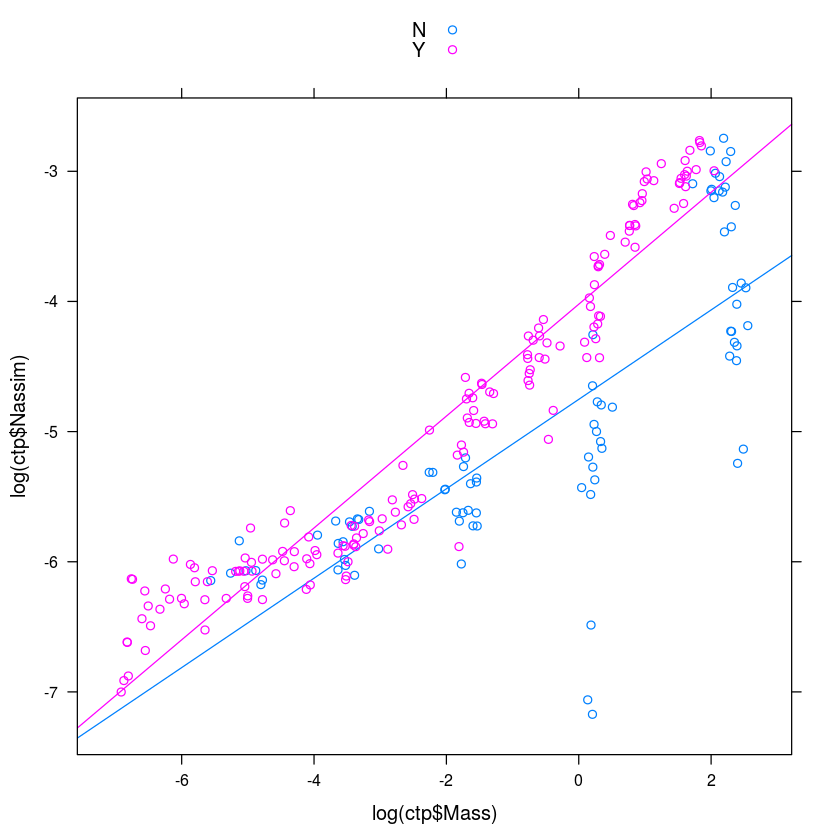

In [268]:
xyplot(log(ctp$Nassim) ~ log(ctp$Mass), group=ctp$Fgp, type=c('p', 'r'), auto.key=TRUE)

### e) The linear trend is definitely better when the caterpillars are in a free growth period

### Problem 2.38

In [269]:
columns = c('Mass','Intake','WetFrass','DryFrass','Cassim','Nassim')
Caterpillars = na.omit(Caterpillars)
for(col in columns) {
    print(paste(col, 'vs', 'Nfrass', stats::cor(Caterpillars[[col]], Caterpillars$Nfrass)))
}
print(paste('Max correlation is Wetfrass vs Nfrass', .99))

[1] "Mass vs Nfrass 0.886614490704987"
[1] "Intake vs Nfrass 0.93621674775528"
[1] "WetFrass vs Nfrass 0.990795782422382"
[1] "DryFrass vs Nfrass 0.983045869634953"
[1] "Cassim vs Nfrass 0.900128545560642"
[1] "Nassim vs Nfrass 0.852377635906661"
[1] "Max correlation is Wetfrass vs Nfrass 0.99"


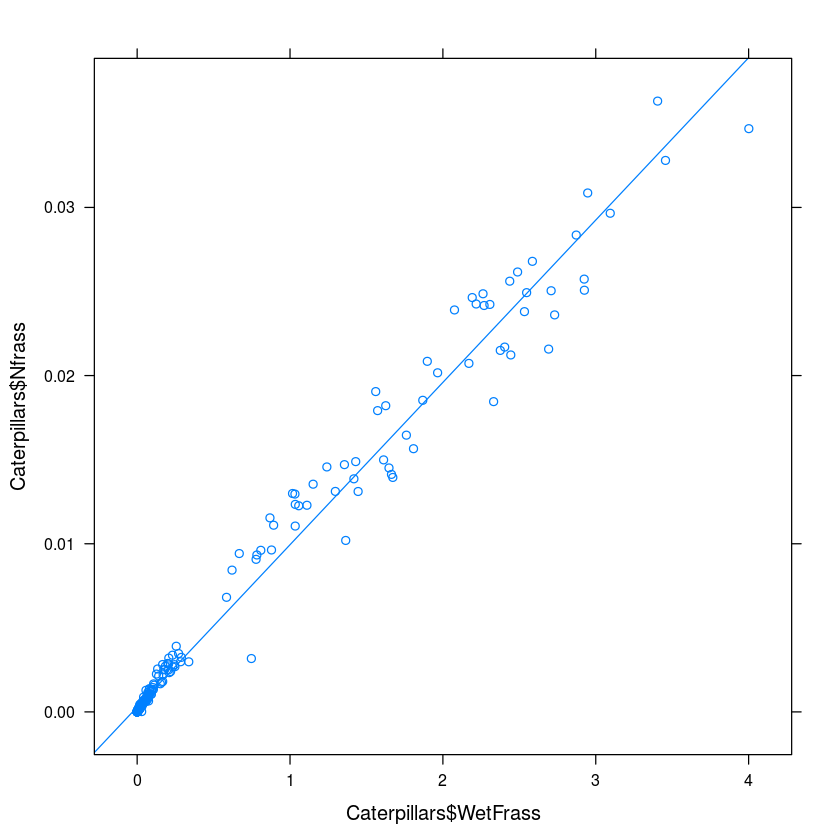

In [270]:
xyplot(Caterpillars$Nfrass ~ Caterpillars$WetFrass, type=c('p','r'))

In [271]:
wetFrassNfrassLm = lm(Caterpillars$Nfrass ~ Caterpillars$WetFrass)
summary(wetFrassNfrassLm)


Call:
lm(formula = Caterpillars$Nfrass ~ Caterpillars$WetFrass)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0046996 -0.0002752 -0.0002071  0.0001488  0.0036947 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.895e-04  8.410e-05   3.442 0.000675 ***
Caterpillars$WetFrass 9.653e-03  8.325e-05 115.962  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001165 on 251 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9816 
F-statistic: 1.345e+04 on 1 and 251 DF,  p-value: < 2.2e-16


### b) Regression Equation: $\hat{Nfrass} = 2.895\mathrm{e}{-4} + 9.653\mathrm{e}{-3}*\text{wetfrass}$

In [272]:
cor.test(Caterpillars$WetFrass, Caterpillars$Nfrass)


	Pearson's product-moment correlation

data:  x and y
t = 115.96, df = 251, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9882214 0.9928095
sample estimates:
      cor 
0.9907958 


### Based on the p-value, the data suggests that the true correlation is significantly different from 0

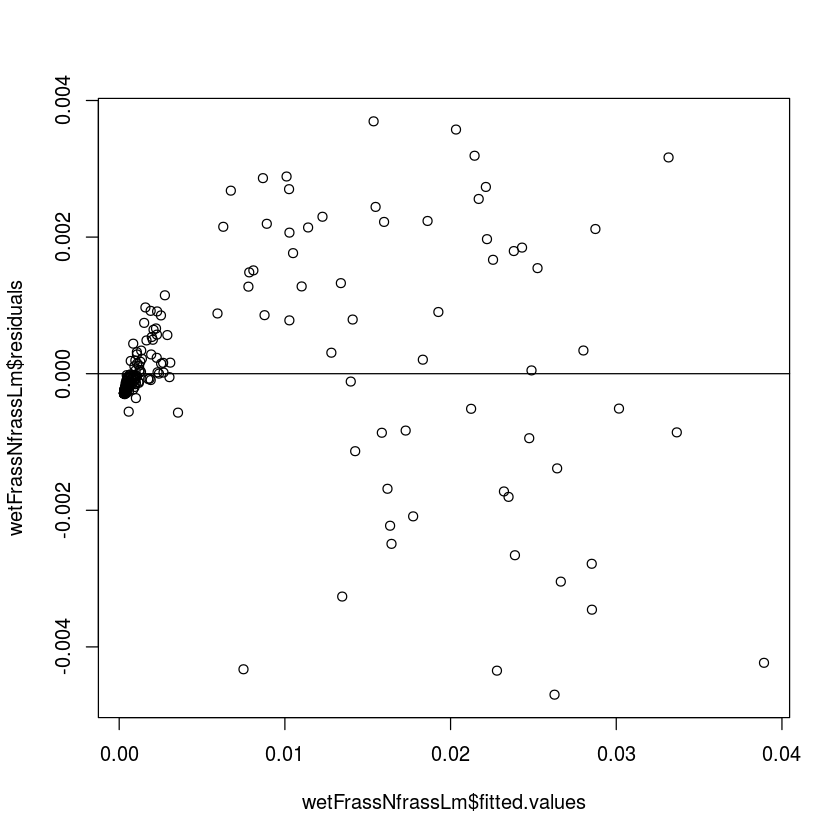

In [273]:
plot(wetFrassNfrassLm$fitted.values, wetFrassNfrassLm$residuals)
abline(h=0)

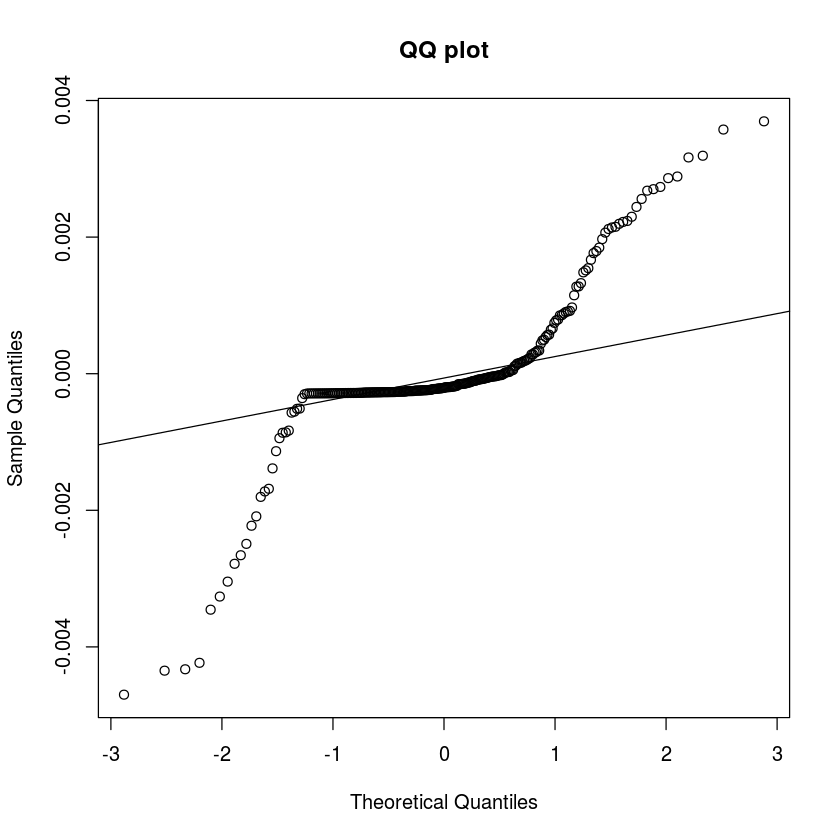

In [274]:
qqnorm(wetFrassNfrassLm$residuals, main='QQ plot')
qqline(wetFrassNfrassLm$residuals)

In [275]:
summary(wetFrassNfrassLm)


Call:
lm(formula = Caterpillars$Nfrass ~ Caterpillars$WetFrass)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0046996 -0.0002752 -0.0002071  0.0001488  0.0036947 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.895e-04  8.410e-05   3.442 0.000675 ***
Caterpillars$WetFrass 9.653e-03  8.325e-05 115.962  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001165 on 251 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9816 
F-statistic: 1.345e+04 on 1 and 251 DF,  p-value: < 2.2e-16


### Based on the coefficient of determination, the fit of the model is very good. 98% of the variance in the response variable is explained. Therefore, this model would probably be good for prediction. However, based on the fit vs residuals plot above, it looks like there isn't a zero mean for the error terms and there seems to be a curving pattern in the residuals. Along with that, the qq plot deviates significantly from the normal line. Thus, significance tests for the regression coefficients would not be valid. 

### Problem 2.39

In [276]:
columns = c('Mass','Intake','WetFrass','DryFrass','Nfrass','Nassim')
Caterpillars = na.omit(Caterpillars)
for(col in columns) {
    print(paste(col, 'vs', 'Cassim', stats::cor(Caterpillars[[col]], Caterpillars$Cassim)))
}
print(paste('Max correlation is Intake vs Nfrass', .9930))

[1] "Mass vs Cassim 0.698843213583067"
[1] "Intake vs Cassim 0.993036219552263"
[1] "WetFrass vs Cassim 0.876728592258179"
[1] "DryFrass vs Cassim 0.933629990826588"
[1] "Nfrass vs Cassim 0.900128545560642"
[1] "Nassim vs Cassim 0.992523112618472"
[1] "Max correlation is Intake vs Nfrass 0.993"


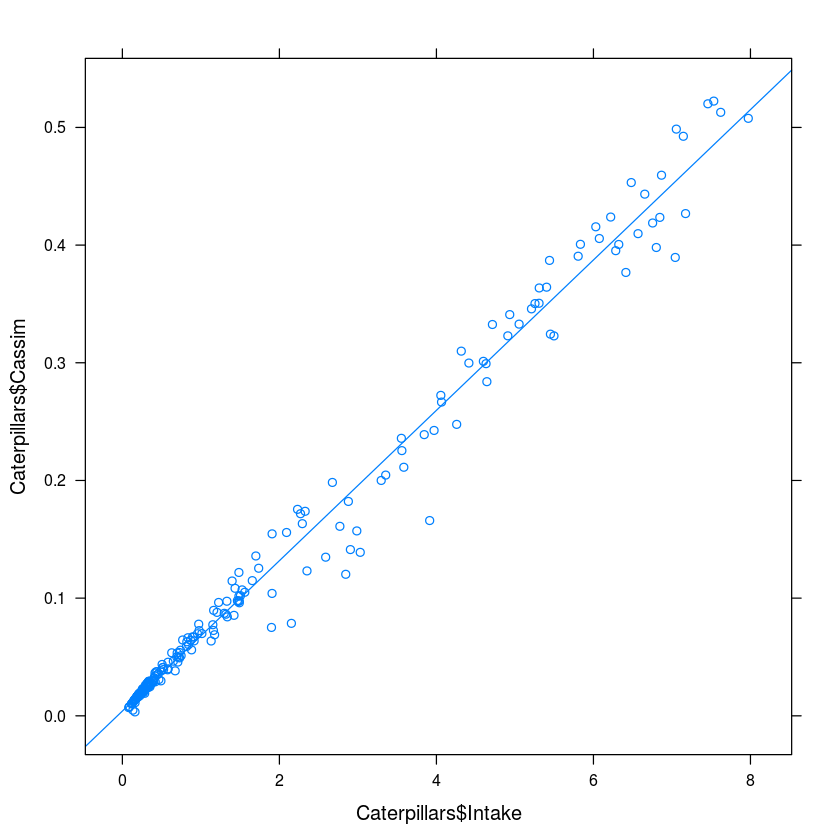

In [277]:
xyplot(Caterpillars$Cassim ~ Caterpillars$Intake, type=c('p','r'))

### Regression Equation: $\hat{Cassim} = .0040488 + .0638894*\text{Intake}$

In [278]:
IntakeCassimLm = lm(Caterpillars$Cassim ~ Caterpillars$Intake)
summary(IntakeCassimLm)


Call:
lm(formula = Caterpillars$Cassim ~ Caterpillars$Intake)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088176 -0.001144  0.000669  0.003861  0.043731 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.0040488  0.0012857   3.149  0.00184 ** 
Caterpillars$Intake 0.0638894  0.0004784 133.543  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01612 on 251 degrees of freedom
Multiple R-squared:  0.9861,	Adjusted R-squared:  0.9861 
F-statistic: 1.783e+04 on 1 and 251 DF,  p-value: < 2.2e-16


In [279]:
cor.test(Caterpillars$Intake, Caterpillars$Cassim)


	Pearson's product-moment correlation

data:  x and y
t = 133.54, df = 251, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9910857 0.9945611
sample estimates:
      cor 
0.9930362 


### Based on the p-value, the true correlation is significantly different from 0

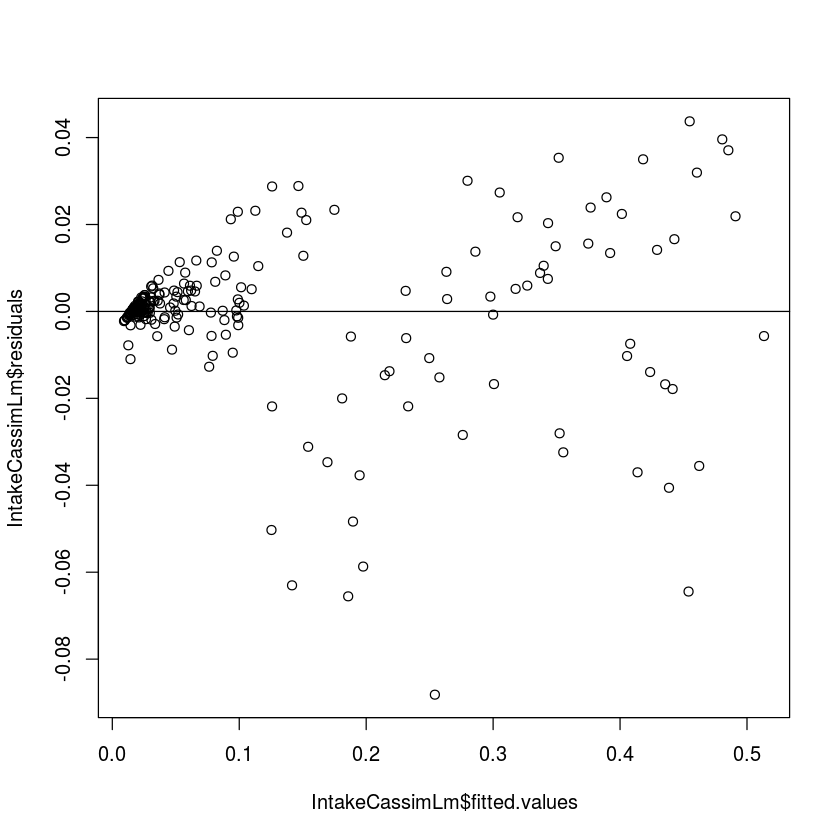

In [280]:
plot(IntakeCassimLm$fitted.values, IntakeCassimLm$residuals)
abline(h=0)

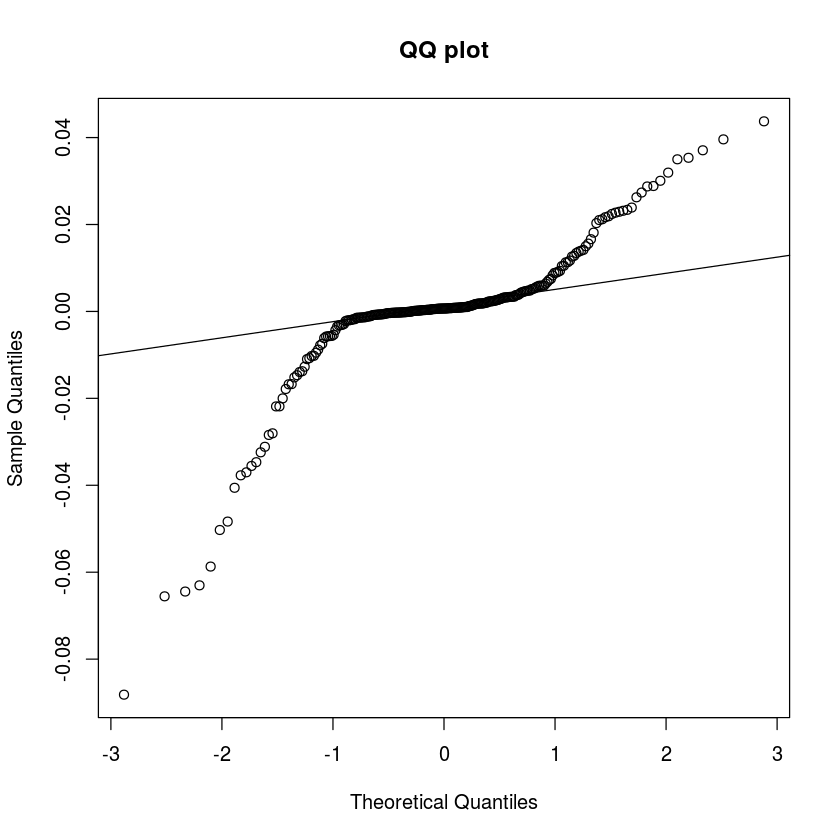

In [281]:
qqnorm(IntakeCassimLm$residuals, main='QQ plot')
qqline(IntakeCassimLm$residuals)

In [282]:
summary(IntakeCassimLm)


Call:
lm(formula = Caterpillars$Cassim ~ Caterpillars$Intake)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088176 -0.001144  0.000669  0.003861  0.043731 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.0040488  0.0012857   3.149  0.00184 ** 
Caterpillars$Intake 0.0638894  0.0004784 133.543  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01612 on 251 degrees of freedom
Multiple R-squared:  0.9861,	Adjusted R-squared:  0.9861 
F-statistic: 1.783e+04 on 1 and 251 DF,  p-value: < 2.2e-16


### The plots are very similar in shape to the plots for WetFrass vs Nfrass. The regression equation would work well for prediction as about 98% of the variance in the response is explained by the model, but inference on the coefficients would not be valid because of violations of the assumptions of the linear regression model (most noticeable in this case is violation of normality of the errors, but also the non linear trend in the errors in the fit vs residuals plot)

### Problem 2.42

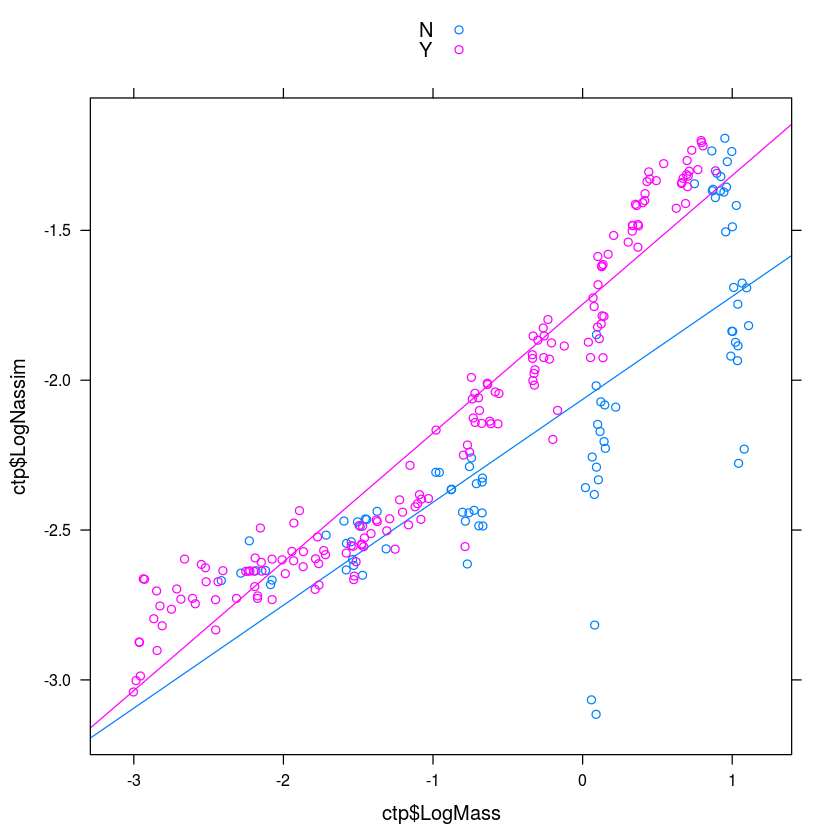

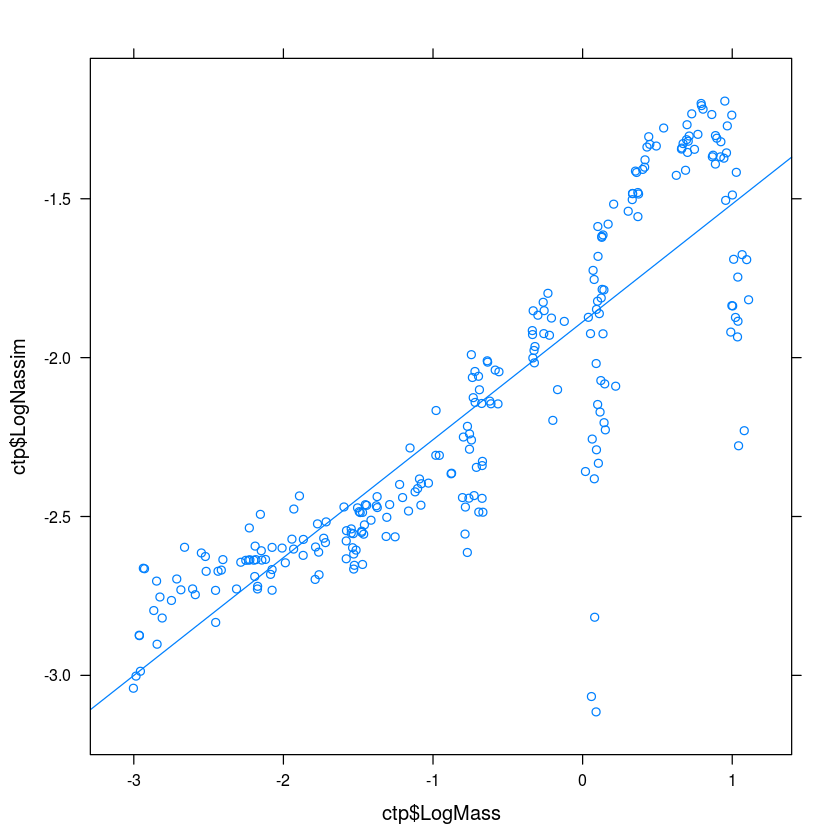

In [283]:
xyplot(ctp$LogNassim ~ ctp$LogMass, group=ctp$Fgp, type=c('p', 'r'), auto.key=TRUE)
xyplot(ctp$LogNassim ~ ctp$LogMass,type=c('p', 'r'), auto.key=TRUE)

### The trend for caterpillars in the free growth period looks very similar to the simple linear model for all the data. It looks like the intercept is relatively equal. However, I think the regression line in the free growth period has a larger slope. 

### Summary: Intake is a good predictor of Cassim with about a 99% correlation and $r^2$. So as Intake in grams/day of food goes up, the CO2 assimilation goes up. WetFrass is a good predictor of Nfrass w/ about a 98% correlation so again as the amount of solid waste produced by the caterpillars goes up, the amount of Nitrogen in frass generally goes up as well. For most of the models that I created, we could get a bette fit by incorporating the Fgp and Instar variables into the model. This is because the models across the entire data set provided an imperfect fit across the different life stages and whether the caterpillar was in or out of the free growth period. Finally, LogMass is a decent predictor of LogNassim (there isn't a linear trend b/w the untransformed versions of these variables at least in this data). The LogMass model explains 75% of the variance in the LogNassim response variable, and there is a very likely a true relationship between these two variables as seen from the p-value obtained from the lm function

### Problem 2.40

[1] -0.1214414


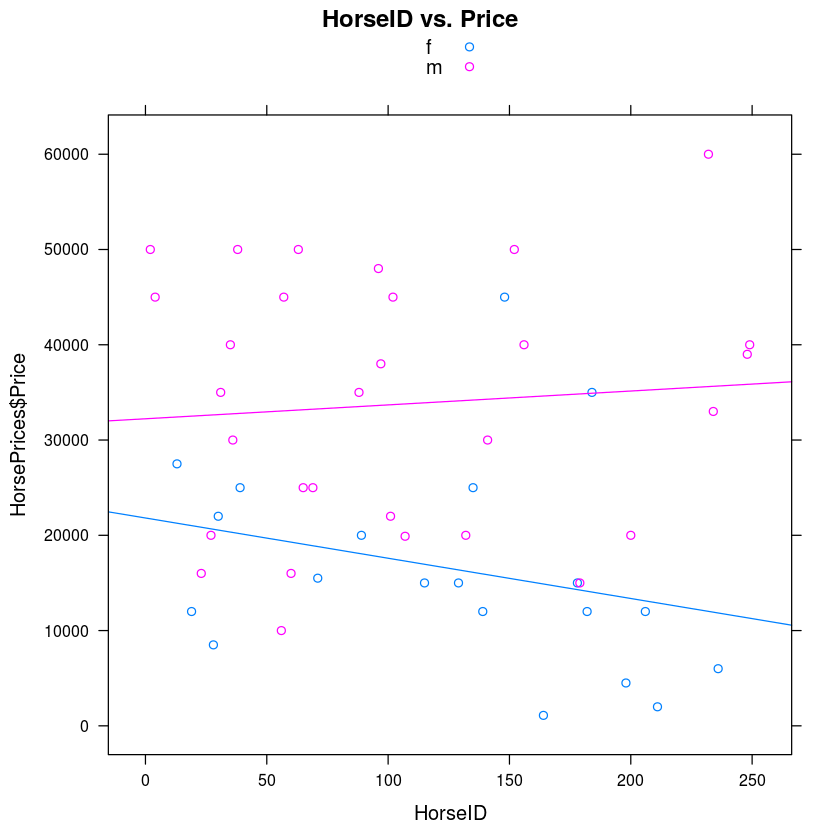

[1] -0.1269775


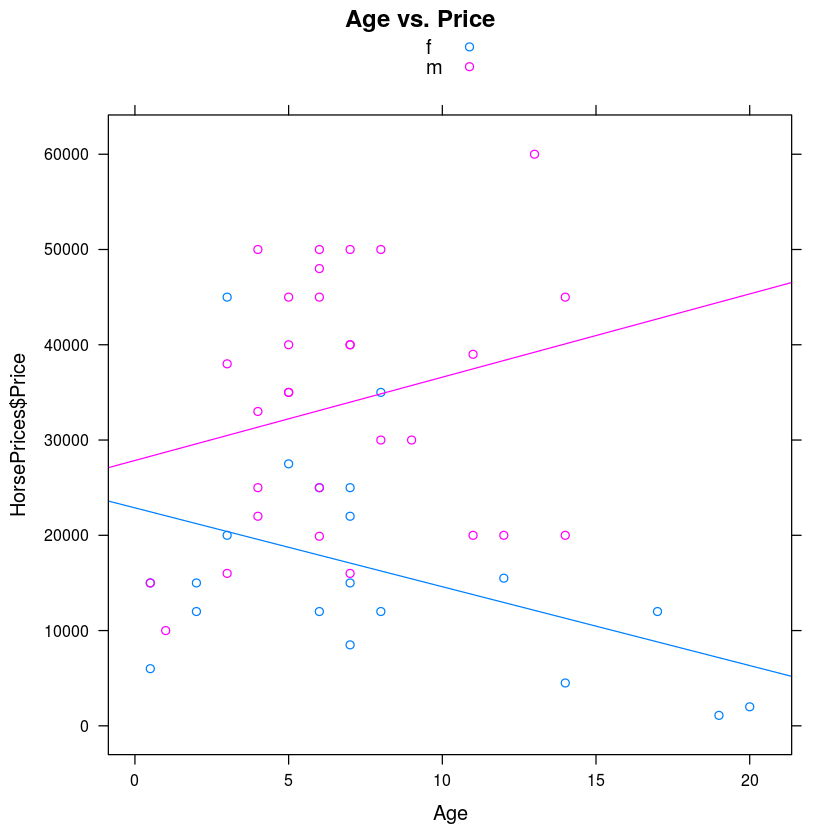

[1] NA


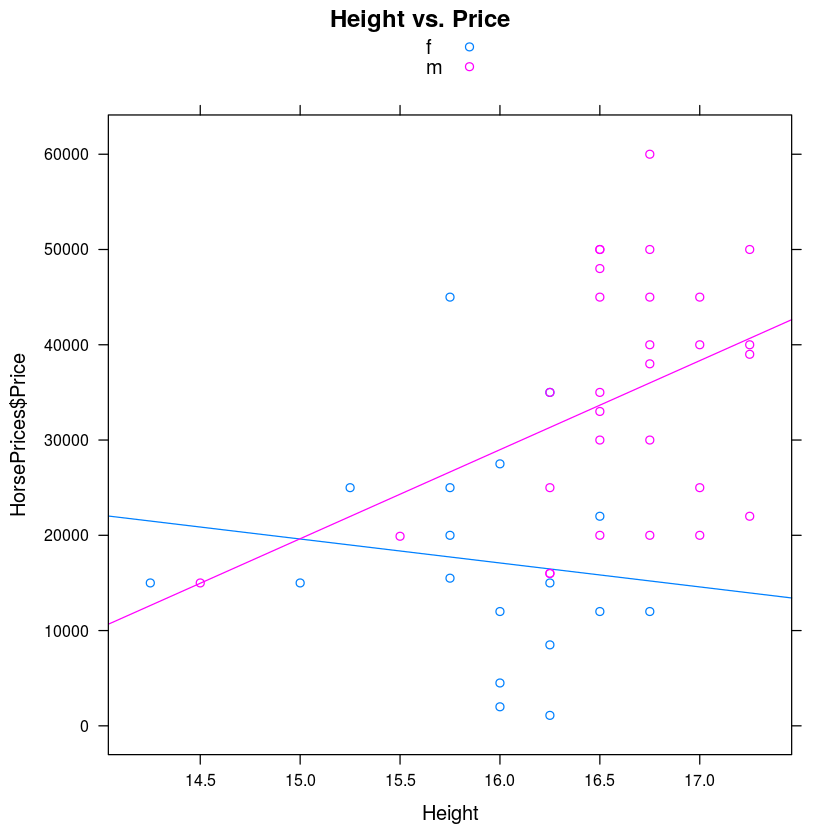

In [284]:
### Predicting price from another variable
data(HorsePrices)
for(col in colnames(HorsePrices)) {
    if(class(HorsePrices[[col]]) == 'numeric' 
       || class(HorsePrices[[col]]) == 'integer' 
       && col != 'Price') {
        print(xyplot(HorsePrices$Price ~ HorsePrices[[col]], 
              main=paste(col, 'vs. Price'), xlab=col,  group=HorsePrices$Sex, type=c('p','r'), auto.key=TRUE))
        print(stats::cor(HorsePrices$Price, HorsePrices[[col]]))
    }
}

[1] -0.5914332
[1] 0.4087525


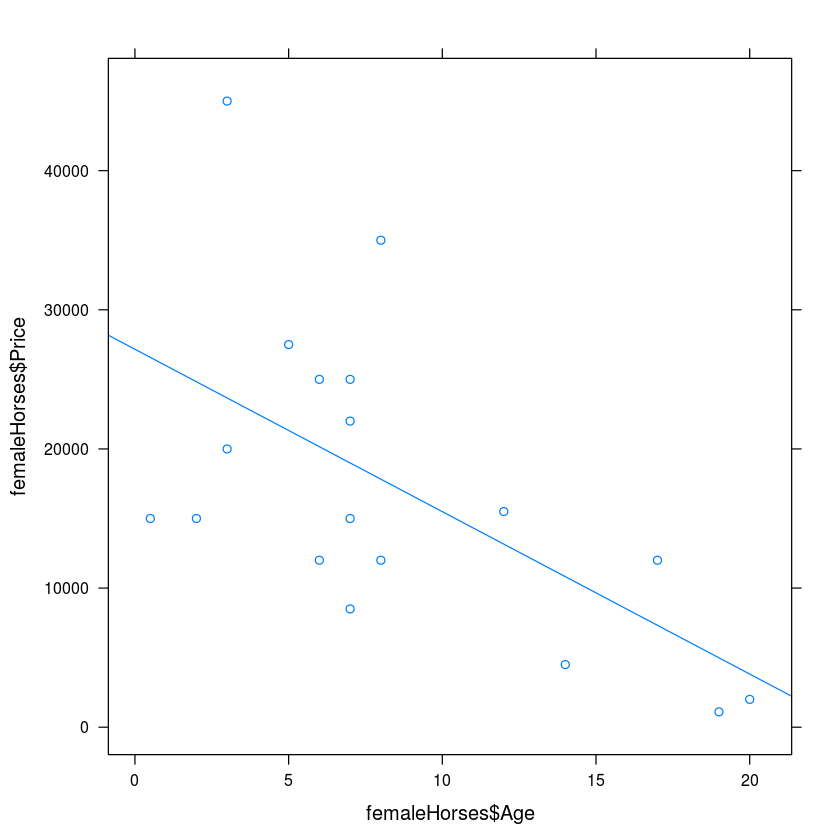

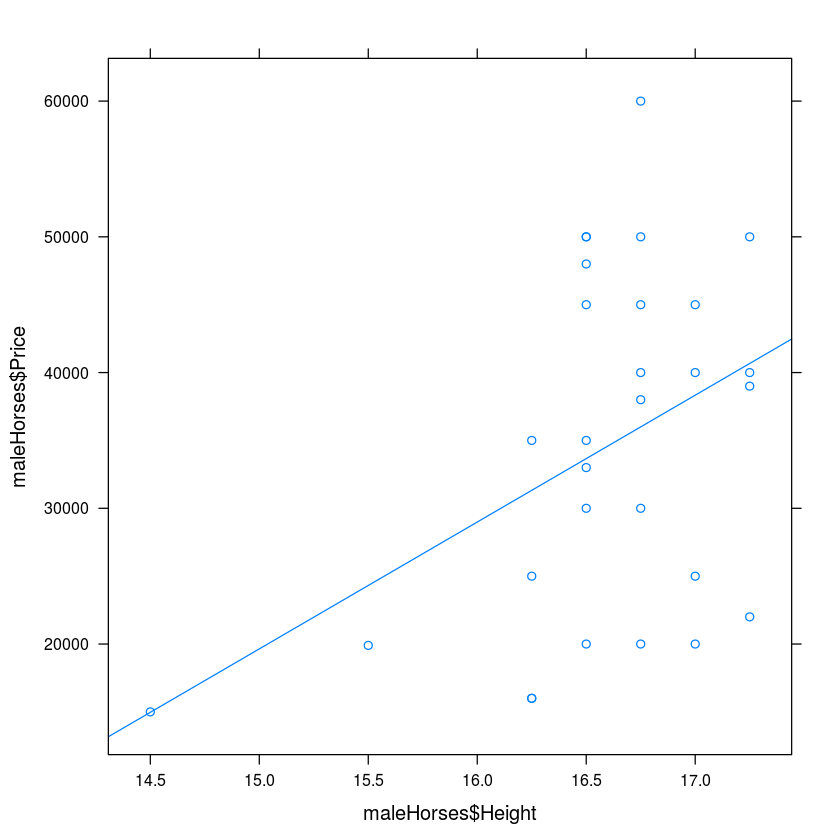

In [285]:
HorsePrices = na.omit(HorsePrices)
femaleHorses = HorsePrices[HorsePrices$Sex == 'f',]
maleHorses = HorsePrices[HorsePrices$Sex == 'm',]
print(cor(femaleHorses$Price, femaleHorses$Age))
print(cor(maleHorses$Price, maleHorses$Height))
# This is the best fit for each sex based on xyplots and correlation 
xyplot(femaleHorses$Price ~ femaleHorses$Age, type=c('p','r'))
xyplot(maleHorses$Price ~ maleHorses$Height, type=c('p','r'))

### I'm gonna go with height as the predictor variable for males with no transformations and Age as predictor for females with no transformation (they have the best correlation with the target variable)

In [286]:
femaleLm = lm(femaleHorses$Price ~ femaleHorses$Age)
summary(femaleLm)


Call:
lm(formula = femaleHorses$Price ~ femaleHorses$Age)

Residuals:
   Min     1Q Median     3Q    Max 
-11579  -6198  -2740   4800  21339 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       27162.8     4014.9   6.765 4.54e-06 ***
femaleHorses$Age  -1167.2      397.8  -2.934  0.00973 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9399 on 16 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3092 
F-statistic: 8.608 on 1 and 16 DF,  p-value: 0.009732


In [287]:
maleLm = lm(maleHorses$Price ~ maleHorses$Age)
summary(maleLm)


Call:
lm(formula = maleHorses$Price ~ maleHorses$Age)

Residuals:
   Min     1Q Median     3Q    Max 
-18594 -10985   1478  10942  22187 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     30839.4     5444.7   5.664 5.15e-06 ***
maleHorses$Age    536.4      708.2   0.758    0.455    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12830 on 27 degrees of freedom
Multiple R-squared:  0.02081,	Adjusted R-squared:  -0.01546 
F-statistic: 0.5738 on 1 and 27 DF,  p-value: 0.4553


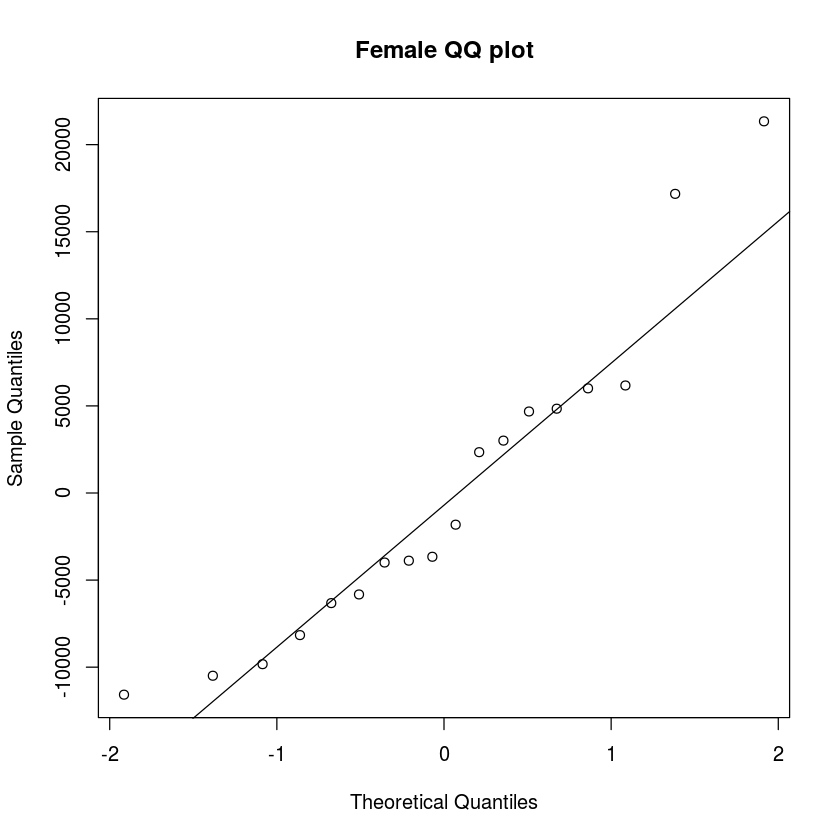

In [288]:
qqnorm(femaleLm$residuals, main='Female QQ plot')
qqline(femaleLm$residuals)

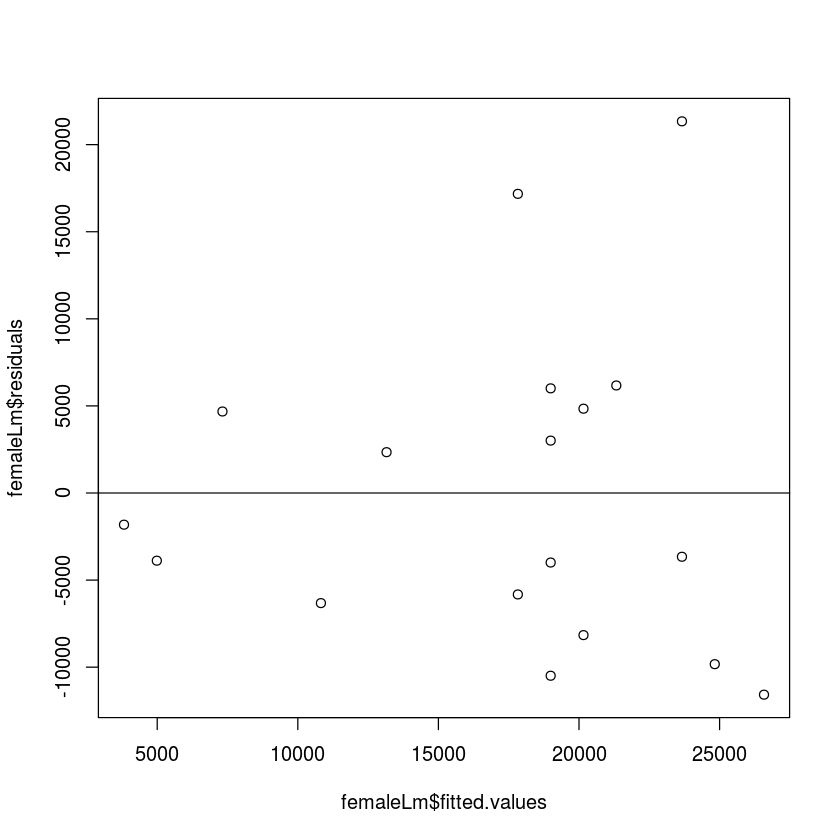

In [289]:
plot(femaleLm$fitted.values, femaleLm$residuals)
abline(h=0)

### Summary: Based on the p-value for the female model, we can conclude that the true slope coefficient is signficantly different from 0. This is not true for the male model as there was a 45% chance of seeing a value (536.4) as extreme as we saw if the null hypothesis were true. Therefore the data suggests that the true value of the coefficient is zero, and there is no association between male height and the price males sell at. The conditions for inference on the female horses model do not seem to be violated. The errors seem roughly normal from the QQ plot, and there looks to be a zero mean with randomly distributed errors on the fit vs residuals plot. We can conclude that female horse price goes down as age goes up. Unfortunately, we cannot make any inference on height vs price of male horses because we could not reject the null hypthesis.

### Problem 2.44

In [290]:
beta_1 = .701 * 104807/657
beta_0 = 247235 - beta_1 * 2009
print(paste("Regression Equation: Gate_hat =", round(beta_0,2), "+", round(beta_1,2), "* Enroll"))

[1] "Regression Equation: Gate_hat = 22576.49 + 111.83 * Enroll"


In [291]:
print(paste('R^2 (amount of variance in response explained by the model) =', round(.701^2*100,2)))

[1] "R^2 (amount of variance in response explained by the model) = 49.14"


In [292]:
print(paste("Number of persons who will use the library with enrollment of 1445:", 22576.49 + 111.83 * 1445))

[1] "Number of persons who will use the library with enrollment of 1445: 184170.84"


In [293]:
print(paste("Residual for enrollment 2200 and gate count 130,000:", 130000 - (22576.49 + 111.83 * 2200)))

[1] "Residual for enrollment 2200 and gate count 130,000: -138602.49"
